# AI Exam Project: Crime Data Analysis

## Step 1: Import Libraries and Load Data

Explanation:

    Import Libraries: The first step involves importing the necessary libraries, such as Pandas, which is crucial for data manipulation and analysis. Pandas simplifies the process of loading and manipulating datasets.
    Load Data: The code loads multiple datasets containing crime data from different sources, such as Borough, LSOA (Lower Super Output Area), and Ward levels for both historical and recent periods. This ensures that the data from various timeframes and granularity is available for analysis. trends.vely.on..

In [2]:
import pandas as pd

# Define file paths
file_paths = {
    'borough_historical': 'MPS Borough Level Crime (Historical).csv',
    'borough_recent': 'MPS Borough Level Crime (most recent 24 months).csv',
    'lsoa_historical': 'MPS LSOA Level Crime (Historical).csv',
    'lsoa_recent': 'MPS LSOA Level Crime (most recent 24 months).csv',
    'ward_historical': 'MPS Ward Level Crime (Historical).csv',
    'ward_recent': 'MPS Ward Level Crime (most recent 24 months).csv',
    'reported': 'reported.csv'
}

# Load all the data
borough_historical = pd.read_csv(file_paths['borough_historical'])
borough_recent = pd.read_csv(file_paths['borough_recent'])
lsoa_historical = pd.read_csv(file_paths['lsoa_historical'])
lsoa_recent = pd.read_csv(file_paths['lsoa_recent'])
ward_historical = pd.read_csv(file_paths['ward_historical'])
ward_recent = pd.read_csv(file_paths['ward_recent'])
data_reported = pd.read_csv(file_paths['reported'])

# Verify that the reported data includes crimes.total and population columns
print(data_reported.columns)

C:\Users\jeffo\AppData\Local\Temp\ipykernel_24100\3381951555.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Year', 'crimes.total', 'crimes.penal.code', 'crimes.person', 'murder',
       'assault', 'sexual.offenses', 'rape', 'stealing.general', 'burglary',
       'house.theft', 'vehicle.theft', 'out.of.vehicle.theft', 'shop.theft',
       'robbery', 'fraud', 'criminal.damage', 'other.penal.crimes',
       'narcotics', 'drunk.driving', 'population'],
      dtype='object')


## Step 2: Define Common Crime Categories
Explanation:
  This step defines the crime categories that will be analyzed and compared across different datasets.

Benefit
    Standardization: Ensures that you are comparing the same types of crimes across data
sets. This is crucial for accurate analysis and meaningful compa
r.
    Focus: Helps in focusing analysis on specific, well-defined crime categories.gories..

In [3]:
common_crime_categories = ['Murder', 'Assault', 'Burglary', 'Theft']

## Step 3: Helper Functions to Aggregate Data

Explanation:

    Helper Function: This function aggregates the crime data into annual sums. It filters the dataset for a specific crime category, converts date columns to datetime format, extracts the year, and groups the data by year to sum the values.

Benefits:

    Aggregation: Aggregates monthly data into annual sums, simplifying the analysis.
    Yearly Trends: Enables analysis of yearly trends in crime data.ime data.is..

In [4]:
def aggregate_to_annual_corrected(data, major_category_column, crime_category):
    # Filter data for the specified crime category
    crime_data = data[data[major_category_column].str.contains(crime_category, case=False, na=False)]
    # Debugging statement
    print(f"Aggregating {crime_category}: Found {len(crime_data)} rows")
    
    # Identify date columns
    date_columns = [col for col in crime_data.columns if col.isdigit()]
    
    # Sum data across the date columns
    annual_data = crime_data[date_columns].sum(axis=0)
    
    # Convert columns to datetime and extract year
    annual_data.index = pd.to_datetime(annual_data.index, format='%Y%m', errors='coerce').dropna().year
    
    # Group by year and sum the data
    return annual_data.groupby(annual_data.index).sum()

def aggregate_specific_subcategories_corrected(data, major_category_column, subcategories):
    # Filter data for "Violence Against the Person"
    crime_data = data[data[major_category_column].str.contains('Violence Against the Person', case=False, na=False)]
    # Further filter for the specified subcategories
    if 'Minor Category' in crime_data.columns:
        filtered_data = crime_data[crime_data['Minor Category'].isin(subcategories)]
    else:
        filtered_data = crime_data[crime_data['MinorText'].isin(subcategories)]
    # Debugging statement
    print(f"Aggregating specific subcategories ({subcategories}): Found {len(filtered_data)} rows")
    
    # Identify date columns
    date_columns = [col for col in filtered_data.columns if col.isdigit()]
    
    # Sum data across the date columns
    annual_data = filtered_data[date_columns].sum(axis=0)
    
    # Convert columns to datetime and extract year
    annual_data.index = pd.to_datetime(annual_data.index, format='%Y%m', errors='coerce').dropna().year
    
    # Group by year and sum the data
    return annual_data.groupby(annual_data.index).sum()

def aggregate_additional_columns(data, column_name):
    # Identify date columns
    date_columns = [col for col in data.columns if col.isdigit()]
    # Sum data across the date columns
    additional_data = data[date_columns].sum(axis=0)
    # Convert columns to datetime and extract year
    additional_data.index = pd.to_datetime(additional_data.index, format='%Y%m', errors='coerce').dropna().year
    # Group by year and sum the data
    return additional_data.groupby(additional_data.index).sum()


## Step 4: Process All Datasets for Common Categories

Explanation:

    Process Datasets: This function applies the aggregation function to each dataset and combines the results for each crime category. It sums up the data to get a comprehensive view of the data across different datasets.

Benefits:

    Comprehensive Analysis: Provides a complete view of crime trends by combining data from multiple sources.
    Consistency: Ensures consistent analysis across different geographical levels (Borough, LSOA, Ward).ward).is..

In [5]:
def process_datasets(datasets, major_category_column):
    aggregated_data = {}
    for category in common_crime_categories:
        combined_data = pd.concat([aggregate_to_annual_corrected(data, major_category_column, category) for data in datasets], axis=1).sum(axis=1)
        aggregated_data[category] = combined_data
    return aggregated_data

borough_datasets = [borough_historical, borough_recent]
lsoa_datasets = [lsoa_historical, lsoa_recent]
ward_datasets = [ward_historical, ward_recent]

aggregated_borough_data_corrected = process_datasets(borough_datasets, 'MajorText')
aggregated_lsoa_data_corrected = process_datasets(lsoa_datasets, 'Major Category')
aggregated_ward_data_corrected = process_datasets(ward_datasets, 'MajorText')

# Combine all aggregated data for easier access
combined_aggregated_data_corrected = {
    'Murder': pd.concat([
        aggregated_borough_data_corrected['Murder'],
        aggregated_lsoa_data_corrected['Murder'],
        aggregated_ward_data_corrected['Murder']
    ], axis=1).sum(axis=1),
    'Assault': pd.concat([
        aggregated_borough_data_corrected['Assault'],
        aggregated_lsoa_data_corrected['Assault'],
        aggregated_ward_data_corrected['Assault']
    ], axis=1).sum(axis=1),
    'Burglary': pd.concat([
        aggregated_borough_data_corrected['Burglary'],
        aggregated_lsoa_data_corrected['Burglary'],
        aggregated_ward_data_corrected['Burglary']
    ], axis=1).sum(axis=1),
    'Theft': pd.concat([
        aggregated_borough_data_corrected['Theft'],
        aggregated_lsoa_data_corrected['Theft'],
        aggregated_ward_data_corrected['Theft']
    ], axis=1).sum(axis=1)
}


Aggregating Murder: Found 0 rows
Aggregating Murder: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Burglary: Found 66 rows
Aggregating Burglary: Found 120 rows
Aggregating Theft: Found 134 rows
Aggregating Theft: Found 136 rows
Aggregating Murder: Found 0 rows
Aggregating Murder: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Burglary: Found 9974 rows
Aggregating Burglary: Found 9141 rows
Aggregating Theft: Found 18971 rows
Aggregating Theft: Found 16109 rows
Aggregating Murder: Found 0 rows
Aggregating Murder: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Assault: Found 0 rows
Aggregating Burglary: Found 1358 rows
Aggregating Burglary: Found 1360 rows
Aggregating Theft: Found 2718 rows
Aggregating Theft: Found 2711 rows


## Step 5: Aggregate Specific Subcategories (Murder and Assault)

Explanation:

    Aggregate Subcategories: This function targets subcategories related to "Murder" and "Assault" to ensure accurate comparison. It filters data for specific subcategories and aggregates the data.

Benefits:

    Detailed Insights: Provides a detailed view of murder and assault trends over time across different geographical levels.
    Focused Analysis: Ensures that the data for murder and assault is specifically and accurately aggregated.ated.
is..

In [6]:
# Define subcategories for Murder and Assault
subcategories_murder = ['HOMICIDE', 'Homicide']
subcategories_assault = ['VIOLENCE WITH INJURY', 'Violence with Injury']

# Aggregate specific subcategories for murder
aggregated_murder_data_corrected = {
    'borough_historical': aggregate_specific_subcategories_corrected(borough_historical, 'MajorText', subcategories_murder),
    'borough_recent': aggregate_specific_subcategories_corrected(borough_recent, 'MajorText', subcategories_murder),
    'lsoa_historical': aggregate_specific_subcategories_corrected(lsoa_historical, 'Major Category', subcategories_murder),
    'lsoa_recent': aggregate_specific_subcategories_corrected(lsoa_recent, 'Major Category', subcategories_murder),
    'ward_historical': aggregate_specific_subcategories_corrected(ward_historical, 'MajorText', subcategories_murder),
    'ward_recent': aggregate_specific_subcategories_corrected(ward_recent, 'MajorText', subcategories_murder)
}

# Aggregate specific subcategories for assault
aggregated_assault_data_corrected = {
    'borough_historical': aggregate_specific_subcategories_corrected(borough_historical, 'MajorText', subcategories_assault),
    'borough_recent': aggregate_specific_subcategories_corrected(borough_recent, 'MajorText', subcategories_assault),
    'lsoa_historical': aggregate_specific_subcategories_corrected(lsoa_historical, 'Major Category', subcategories_assault),
    'lsoa_recent': aggregate_specific_subcategories_corrected(lsoa_recent, 'Major Category', subcategories_assault),
    'ward_historical': aggregate_specific_subcategories_corrected(ward_historical, 'MajorText', subcategories_assault),
    'ward_recent': aggregate_specific_subcategories_corrected(ward_recent, 'MajorText', subcategories_assault)
}

# Combine all aggregated data for murder and assault for easier access
combined_aggregated_data_corrected['Murder'] = pd.concat([
    aggregated_murder_data_corrected['borough_historical'],
    aggregated_murder_data_corrected['borough_recent'],
    aggregated_murder_data_corrected['lsoa_historical'],
    aggregated_murder_data_corrected['lsoa_recent'],
    aggregated_murder_data_corrected['ward_historical'],
    aggregated_murder_data_corrected['ward_recent']
], axis=1).sum(axis=1)

combined_aggregated_data_corrected['Assault'] = pd.concat([
    aggregated_assault_data_corrected['borough_historical'],
    aggregated_assault_data_corrected['borough_recent'],
    aggregated_assault_data_corrected['lsoa_historical'],
    aggregated_assault_data_corrected['lsoa_recent'],
    aggregated_assault_data_corrected['ward_historical'],
    aggregated_assault_data_corrected['ward_recent']
], axis=1).sum(axis=1)


Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 33 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 33 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 1116 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 198 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 534 rows
Aggregating specific subcategories (['HOMICIDE', 'Homicide']): Found 172 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 34 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 34 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 4988 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 4984 rows
Aggregating specific subcategories (['VIOLENCE WITH INJURY', 'Violence with Injury']): Found 680 rows
Aggregating specific su

## Step 6: Aggregate Total Crimes and Population

Explanation:

    Aggregate Total Crimes and Population: Helper functions are used to aggregate total crime data and population data from different datasets.

Benefits:

    Overall Crime Trends: Provides an overview of total crime trends over time.
    Population Trends: Provides an overview of population trends over time.
    Normalization: Enables calculation of crime rates per capita for more meaningful comparisons.omparisons.

In [7]:
# Aggregate crimes.total for each dataset
aggregated_total_crimes = {
    'borough_historical': aggregate_additional_columns(borough_historical, 'crimes.total'),
    'borough_recent': aggregate_additional_columns(borough_recent, 'crimes.total'),
    'lsoa_historical': aggregate_additional_columns(lsoa_historical, 'crimes.total'),
    'lsoa_recent': aggregate_additional_columns(lsoa_recent, 'crimes.total'),
    'ward_historical': aggregate_additional_columns(ward_historical, 'crimes.total'),
    'ward_recent': aggregate_additional_columns(ward_recent, 'crimes.total')
}

# Combine total crimes data
combined_total_crimes = pd.concat([
    aggregated_total_crimes['borough_historical'],
    aggregated_total_crimes['borough_recent'],
    aggregated_total_crimes['lsoa_historical'],
    aggregated_total_crimes['lsoa_recent'],
    aggregated_total_crimes['ward_historical'],
    aggregated_total_crimes['ward_recent']
], axis=1).sum(axis=1)

# Aggregate population for each dataset
aggregated_population = {
    'borough_historical': aggregate_additional_columns(borough_historical, 'population'),
    'borough_recent': aggregate_additional_columns(borough_recent, 'population'),
    'lsoa_historical': aggregate_additional_columns(lsoa_historical, 'population'),
    'lsoa_recent': aggregate_additional_columns(lsoa_recent, 'population'),
    'ward_historical': aggregate_additional_columns(ward_historical, 'population'),
    'ward_recent': aggregate_additional_columns(ward_recent, 'population')
}

# Combine population data
combined_population = pd.concat([
    aggregated_population['borough_historical'],
    aggregated_population['borough_recent'],
    aggregated_population['lsoa_historical'],
    aggregated_population['lsoa_recent'],
    aggregated_population['ward_historical'],
    aggregated_population['ward_recent']
], axis=1).sum(axis=1)

# Check the aggregated data
print(combined_total_crimes.head())
print(combined_population.head())


2010    1791741.0
2011    2362673.0
2012    2293280.0
2013    2091635.0
2014    2072304.0
dtype: float64
2010    1791741.0
2011    2362673.0
2012    2293280.0
2013    2091635.0
2014    2072304.0
dtype: float64


## Step 7: Update the Comparison DataFrame

Explanation:

    Create Comparison DataFrame: Initializes a DataFrame to hold both reported and aggregated crime data, ensuring it includes relevant columns for analysis.

Benefits:

    Comparison Framework: Provides a structure for comparing reported data with aggregated data.
    Comprehensive Comparison: Enables direct comparison between reported and aggregated crime data.e successful.

In [8]:
# Create the comparison DataFrame
filtered_comparison_df_corrected = pd.DataFrame({
    'Year': data_reported['Year'],
    'reported_murder': data_reported['murder'],
    'reported_assault': data_reported['assault'],
    'reported_burglary': data_reported['burglary'],
    'reported_theft': data_reported['stealing.general'],
    'reported_crimes_total': data_reported['crimes.total'],
    'reported_population': data_reported['population']
})

# Add aggregated crime data to the comparison DataFrame
for category in common_crime_categories:
    filtered_comparison_df_corrected[f'mps_{category.lower()}'] = combined_aggregated_data_corrected[category].reindex(filtered_comparison_df_corrected['Year']).values

# Add aggregated total crimes and population to the comparison DataFrame
filtered_comparison_df_corrected['mps_crimes_total'] = combined_total_crimes.reindex(filtered_comparison_df_corrected['Year']).values
filtered_comparison_df_corrected['mps_population'] = combined_population.reindex(filtered_comparison_df_corrected['Year']).values

# Filter the comparison DataFrame to only include years from 2010 onwards
filtered_comparison_df_corrected = filtered_comparison_df_corrected[filtered_comparison_df_corrected['Year'] >= 2010]

# Display the final corrected comparison DataFrame
print(filtered_comparison_df_corrected.head(10))

    Year  reported_murder  reported_assault  reported_burglary  \
60  2010                4               936                985   
61  2011                2               947                995   
62  2012                2               914                922   
63  2013                3               837                888   
64  2014                3               859                913   
65  2015                3               868                917   

    reported_theft  reported_crimes_total  reported_population  mps_murder  \
60            5631                  14605              9378000       295.0   
61            5783                  14988              9449000       345.0   
62            5613                  14734              9519000       310.0   
63            5552                  14603              9644000       311.0   
64            5572                  14890              9747000       267.0   
65            5404                  15342              9851000       

## Step 9: Create and Save the Combined CSV File

Explanation:

    Export to CSV: Saves the combined DataFrame to a CSV file named combined_crime_data.csv.

Benefits:

    Documentation: Provides a clear and comprehensive dataset that can be shared and presented.
    Accessibility: Makes it easy to access and use the data for further analysis or visualization.ccessful.

In [10]:
##Create and Save the Combined CSV File

# Save the combined DataFrame to a CSV file
filtered_comparison_df_corrected.to_csv('combined_crime_data.csv', index=False)

# Display a confirmation message
print("Combined CSV file has been created and saved as 'combined_crime_data.csv'")


Combined CSV file has been created and saved as 'combined_crime_data.csv'


## Plots over reported and MPS data

Explanation:

    Objective: Load and verify the combined crime data from a CSV file.

    Key Steps:
        Import Libraries:
            pandas is used for data manipulation and analysis.
            matplotlib.pyplot and seaborn are used for data visualization.
        Load Data: The combined_crime_data.csv file is read into a DataFrame named combined_data using pd.read_csv().
        Data Verification: combined_data.head() prints the first few rows of the dataset to confirm that the data has been loaded correctly.

    Benefits for Your Project:
        Centralized Data Management: By loading data into a DataFrame, you have a centralized structure for manipulation and analysis.
        Data Verification: Ensures data integrity before proceeding with any analysis, which is crucial for accurate results.alysis.is.e.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
combined_data = pd.read_csv('combined_crime_data.csv')

# Display the first few rows to verify the data
print(combined_data.head())



   Year  reported_murder  reported_assault  reported_burglary  reported_theft  \
0  2010                4               936                985            5631   
1  2011                2               947                995            5783   
2  2012                2               914                922            5613   
3  2013                3               837                888            5552   
4  2014                3               859                913            5572   

   reported_crimes_total  reported_population  mps_murder  mps_assault  \
0                  14605              9378000       295.0     151307.0   
1                  14988              9449000       345.0     184399.0   
2                  14734              9519000       310.0     174456.0   
3                  14603              9644000       311.0     168199.0   
4                  14890              9747000       267.0     203438.0   

   mps_burglary  mps_theft  mps_crimes_total  mps_population  
0    

## Step 2: Add Plotting Functions

Explanation

    Objective: Display the names of the columns in the dataset to understand the available data fields.
    Key Steps:
        Column Display: The columns attribute is accessed to print out all column names.
    Benefits for Your Project:
        Data Understanding: Knowing the columns helps in planning the analysis and determining which data is relevant for your specific analysis goals.ots

In [20]:
# Display the columns in the combined_data DataFrame
print(combined_data.columns)


Index(['Year', 'reported_murder', 'reported_assault', 'reported_burglary',
       'reported_theft', 'reported_crimes_total', 'reported_population',
       'mps_murder', 'mps_assault', 'mps_burglary', 'mps_theft',
       'mps_crimes_total', 'mps_population'],
      dtype='object')


### Line Plots

Explanation

    Objective: Define and use a function to create line plots that show crime data trends over time, with a secondary y-axis for population data.
    Key Steps:
        Function Definition:
            plot_line_with_secondary() is defined to plot line graphs for columns with specific prefixes (reported_ or mps_).
            Uses twinx() to add a secondary y-axis for population data.
            Uses seaborn.lineplot() for plotting, differentiating between population and crime counts.
        Execution: Calls the function for both reported and MPS data to visualize trends.
    Benefits for Your Project:
        Trend Analysis: Enables visualization of trends over time, highlighting changes in crime rates.
        Comparison: Facilitates comparison of population data alongside crime data, providing insights into potential correlations.od.

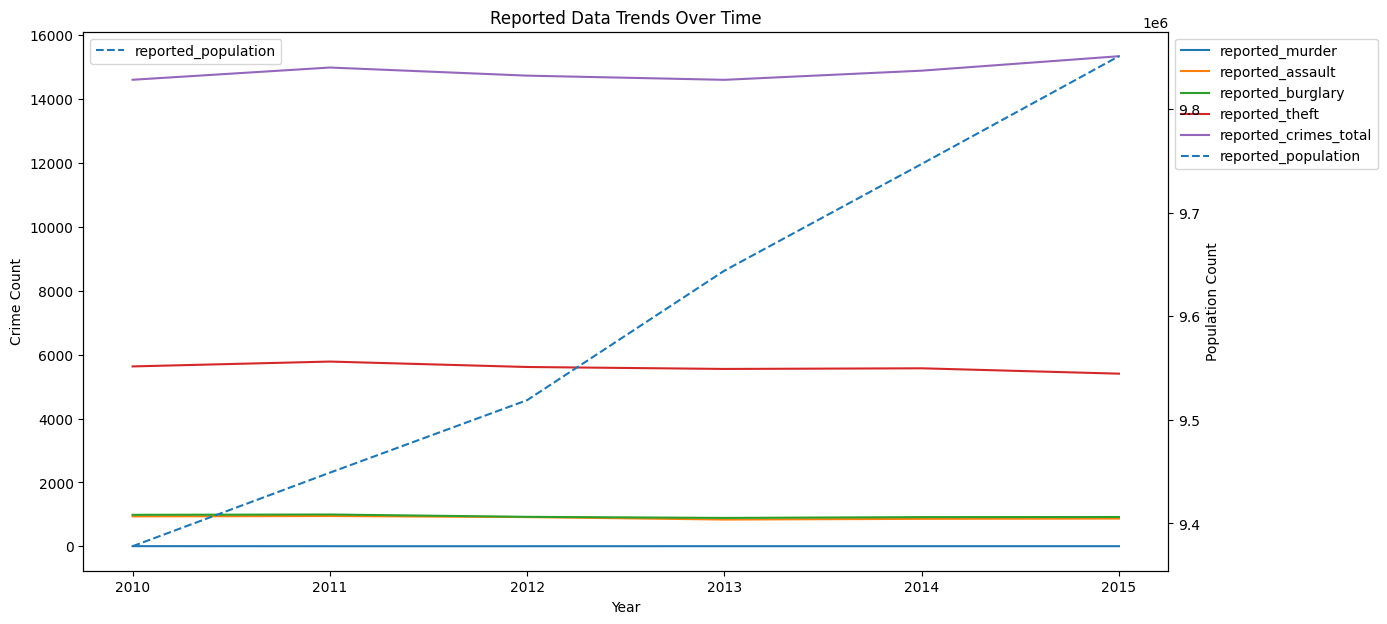

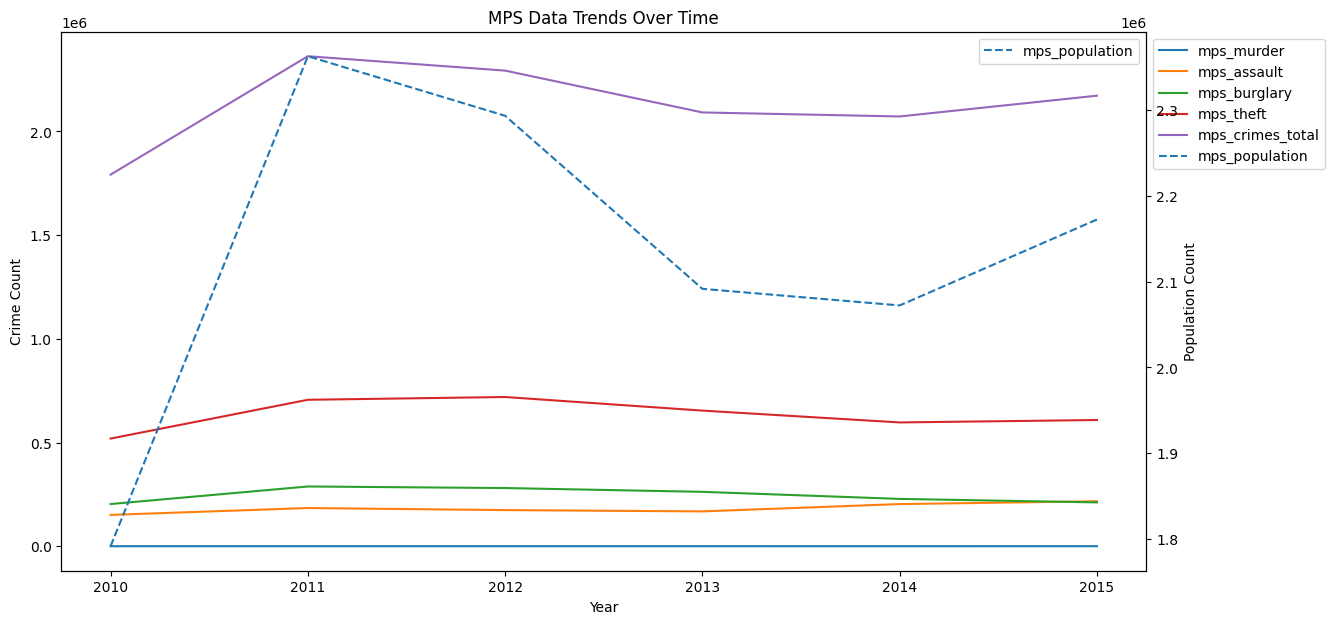

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot line plots with a secondary y-axis for population
def plot_line_with_secondary(data, title, y_label, column_prefix):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax2 = ax1.twinx()
    
    for column in data.columns:
        if column.startswith(column_prefix):
            if column.endswith('population'):
                sns.lineplot(data=data, x='Year', y=column, ax=ax2, label=column, linestyle='--')
            else:
                sns.lineplot(data=data, x='Year', y=column, ax=ax1, label=column)
                
    ax1.set_title(title)
    ax1.set_xlabel('Year')
    ax1.set_ylabel(y_label)
    ax2.set_ylabel('Population Count')
    
    lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.show()

# Plot the combined data for reported and MPS with secondary y-axis for population
plot_line_with_secondary(combined_data, 'Reported Data Trends Over Time', 'Crime Count', 'reported_')
plot_line_with_secondary(combined_data, 'MPS Data Trends Over Time', 'Crime Count', 'mps_')



### Bar Plots

Explanation

    Objective: Define and execute a function to create bar plots of crime data for each year, grouped by crime type.
    Key Steps:
        Function Definition:
            plot_bar_combined() is defined to create bar plots for data with a specified prefix (reported_ or mps_).
            Uses sns.barplot() to create bar charts for different crime types, with data separated by year.
        Execution: The function is called twice to create separate plots for reported and MPS data.
    Benefits for Your Project:
        Crime Type Analysis: Bar plots provide a visual comparison of different crime types, allowing for identification of prevalent crimes in each year.
        Yearly Comparison: Facilitates examination of how crime distribution changes over time.ta.

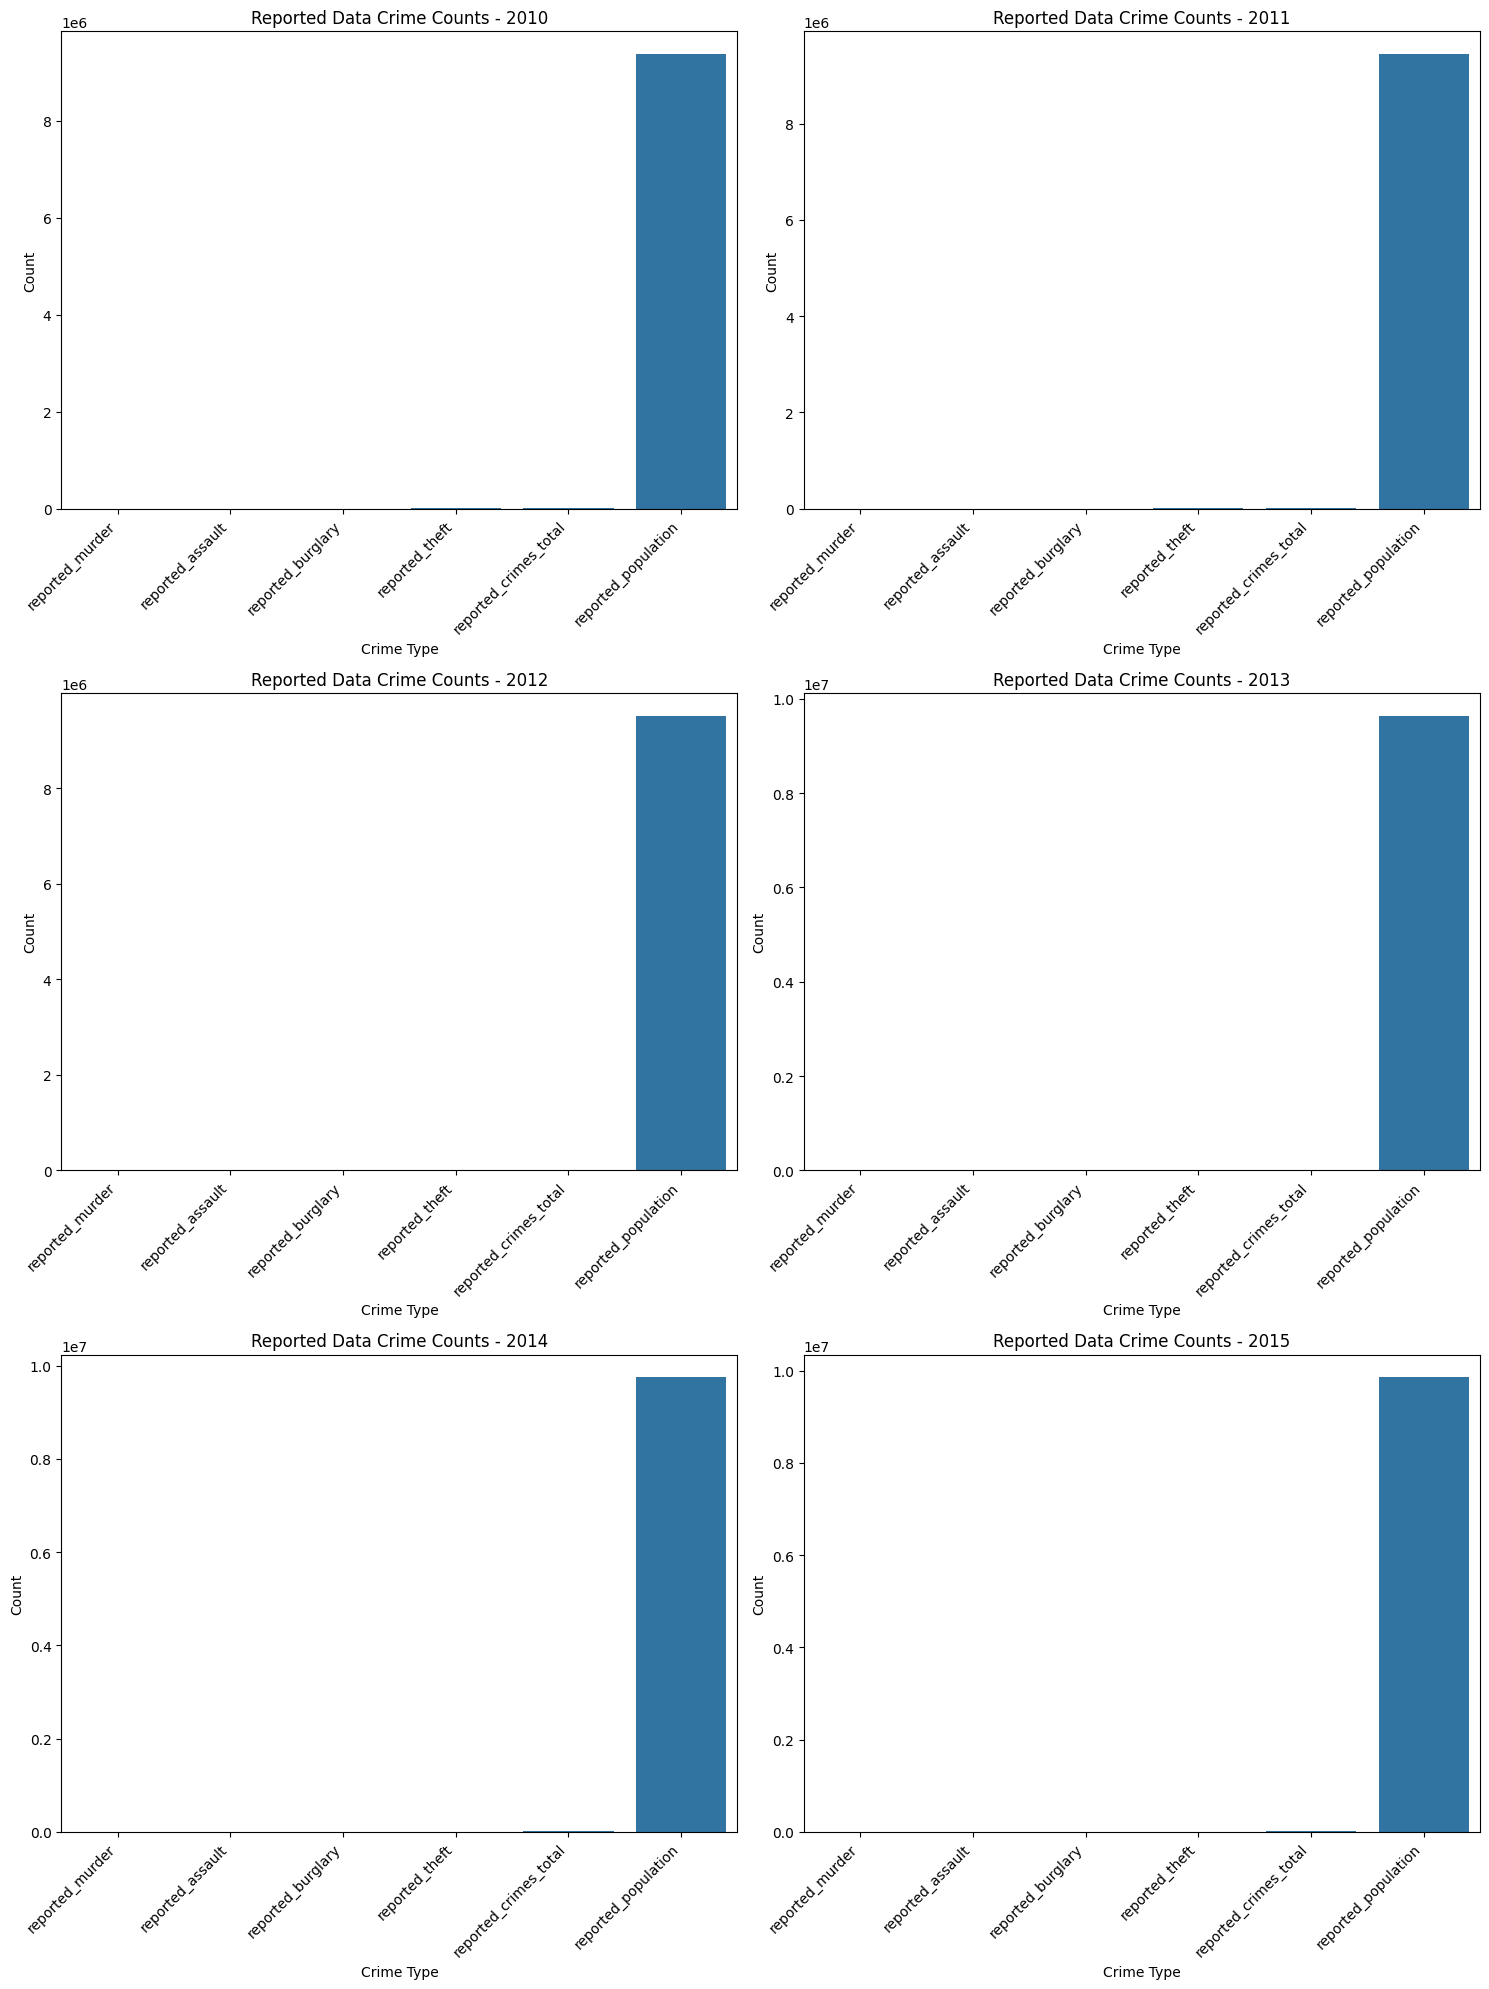

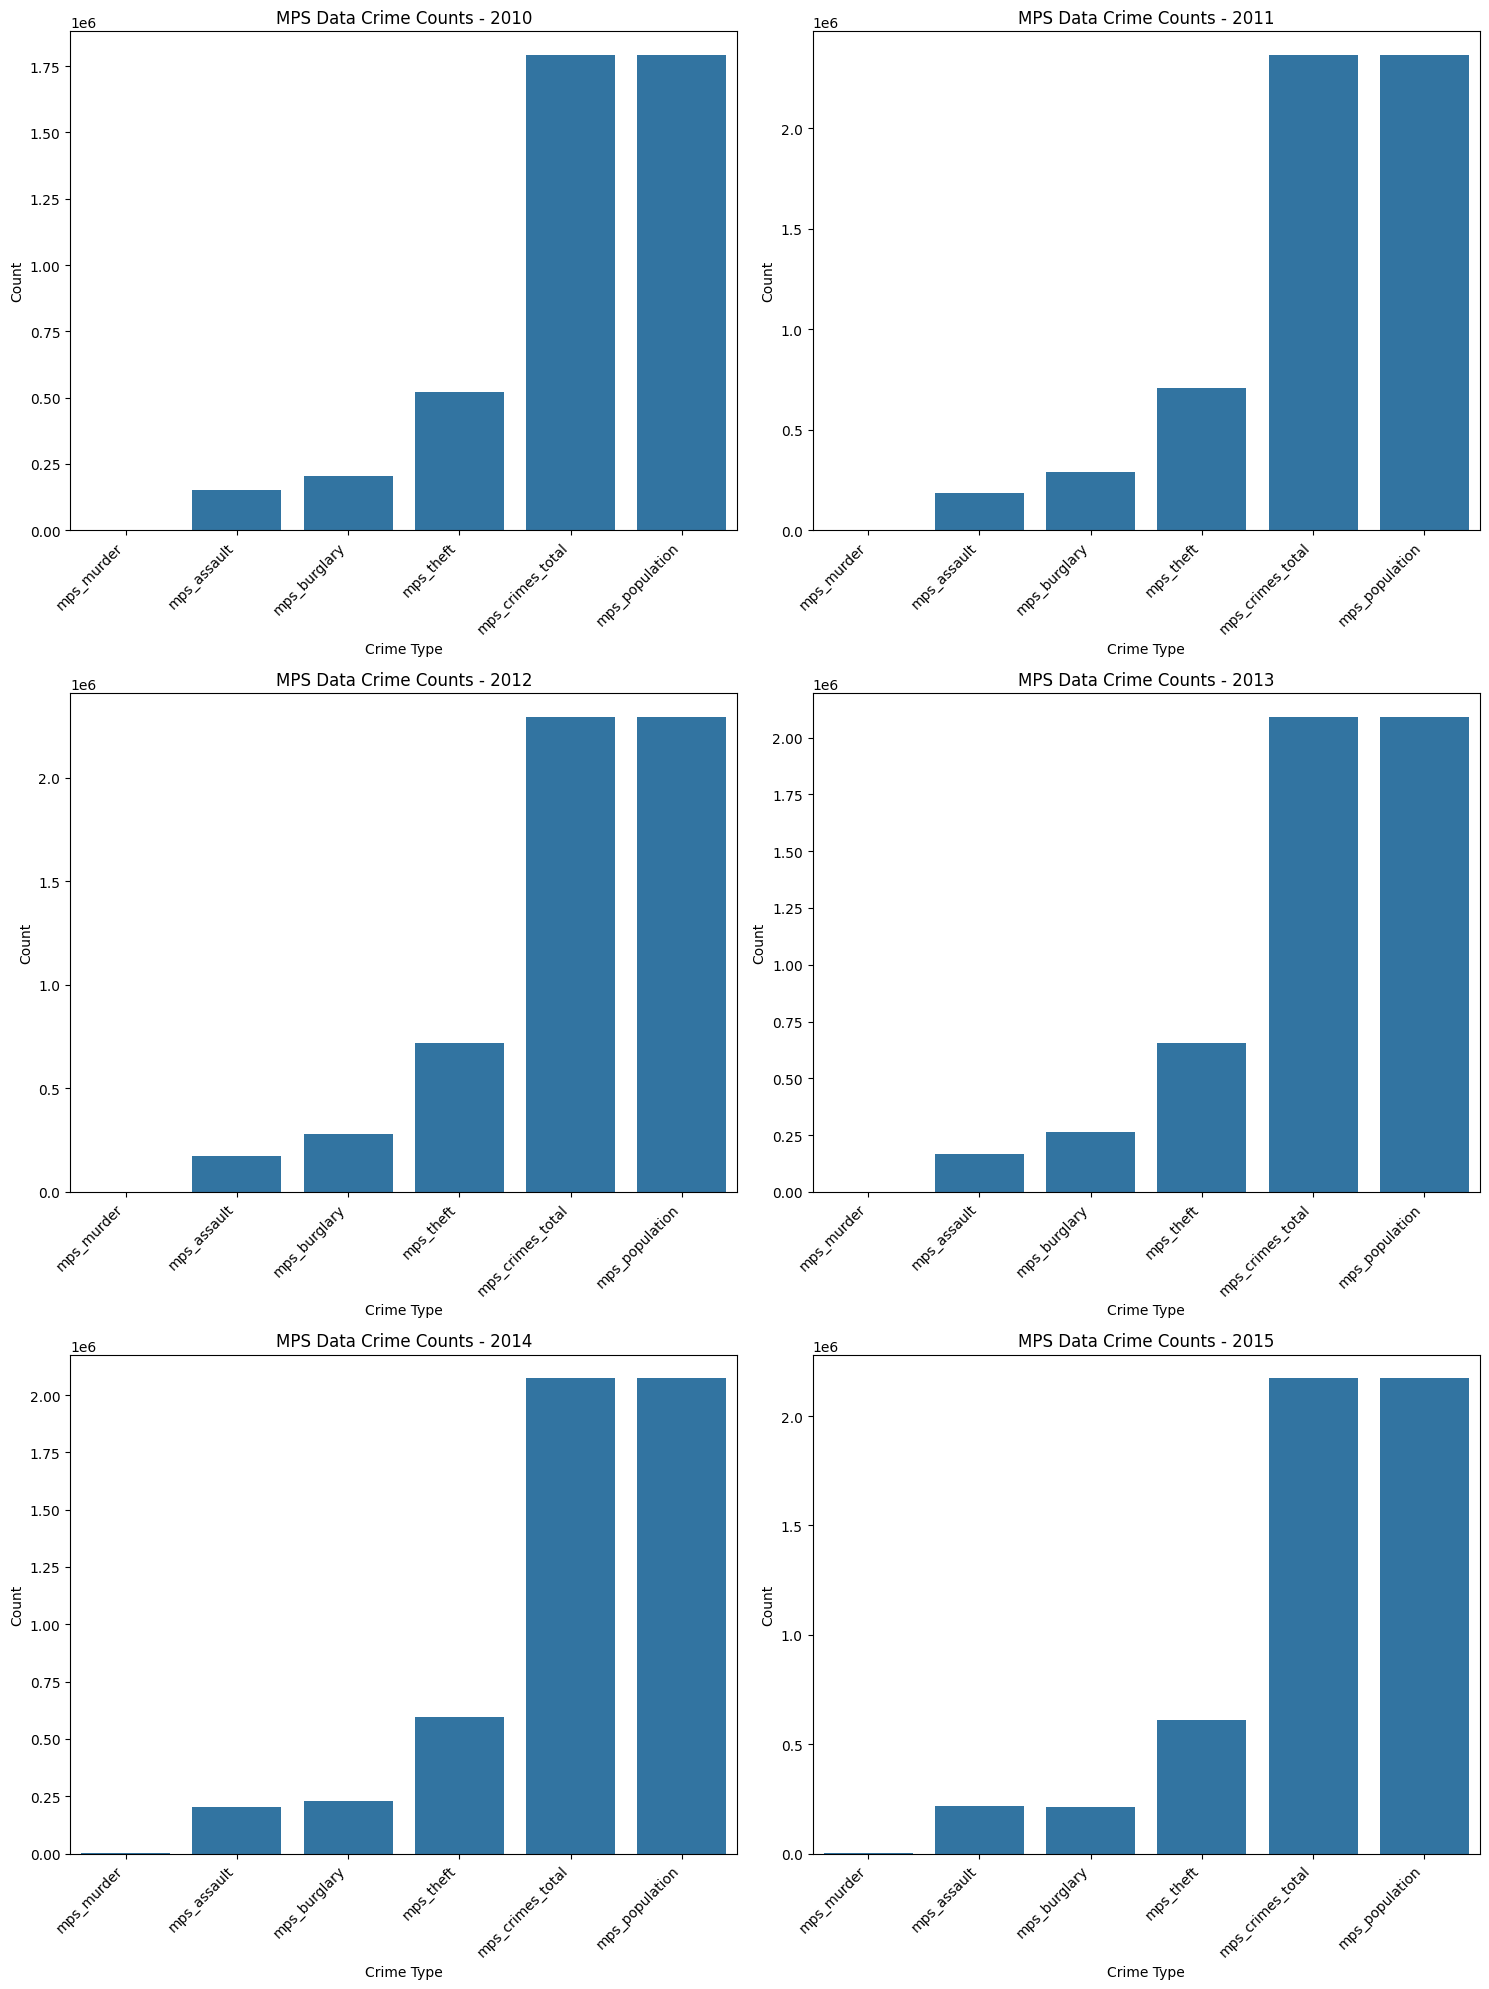

In [26]:
import matplotlib.ticker as ticker

# Function to plot bar plots
def plot_bar(data, title, y_label, column_prefix):
    years = data['Year'].unique()
    fig, axes = plt.subplots(nrows=(len(years)+1)//2, ncols=2, figsize=(15, 20))
    axes = axes.flatten()
    for i, year in enumerate(years):
        ax = axes[i]
        
        year_data = data[data['Year'] == year]
        crime_counts = year_data.filter(like=column_prefix).sum().reset_index()
        crime_counts.columns = ['Crime Type', 'Count']
        
        sns.barplot(x='Crime Type', y='Count', data=crime_counts, ax=ax)
        ax.set_title(f'{title} - {year}')
        ax.set_xlabel('Crime Type')
        ax.set_ylabel('Count')
        
        ax.xaxis.set_major_locator(ticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
    plt.tight_layout()
    plt.show()

plot_bar(combined_data, 'Reported Data Crime Counts', 'Crime Count', 'reported_')
plot_bar(combined_data, 'MPS Data Crime Counts', 'Crime Count', 'mps_')



### Stacked Bar Plots

Explanation

    Objective: Define and use a function to create stacked bar plots showing the distribution of crime types over different years.
    Key Steps:
        Function Definition:
            plot_stacked_bar_combined() is defined to plot stacked bar charts for crime data, excluding population metrics.
            Uses plot(kind='bar', stacked=True) to show how each crime type contributes to the total for each year.
        Execution: The function is applied to both reported and MPS data to create respective plots.
    Benefits for Your Project:
        Distribution Insight: Stacked bar plots provide a detailed view of the composition of crime types, highlighting shifts in crime patterns.
        Visual Summary: Quickly conveys how different crime types contribute to overall crime rates over time.rs.

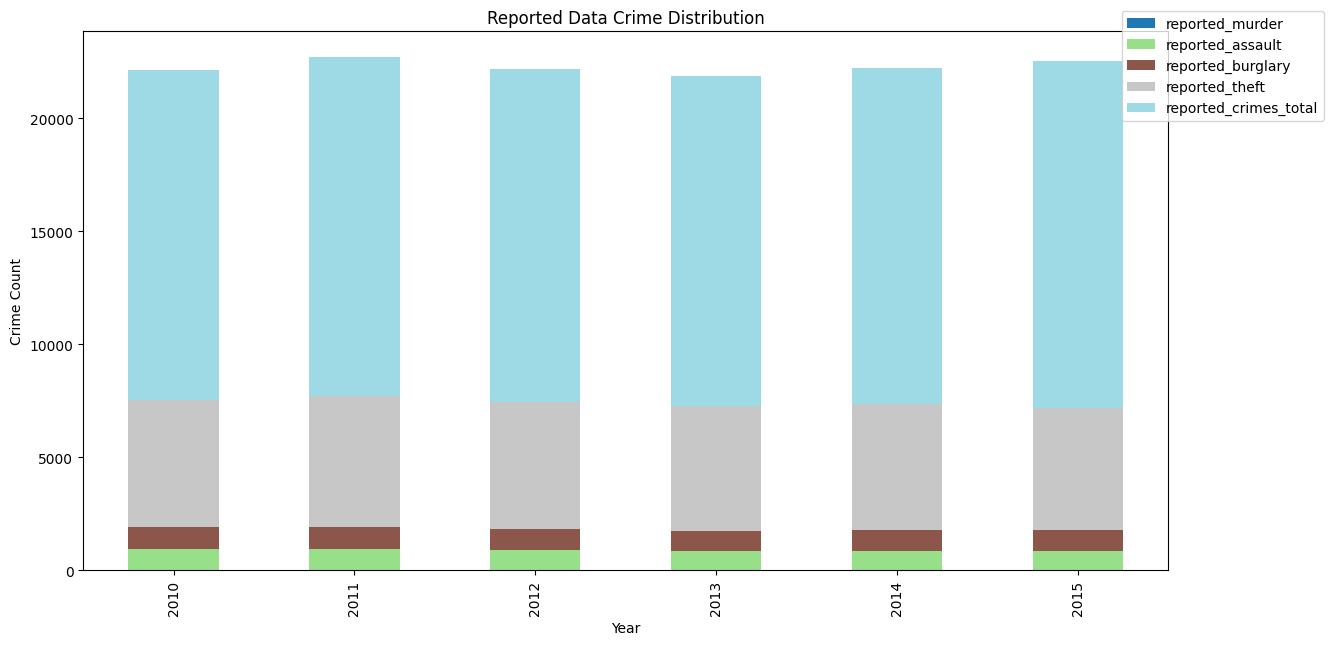

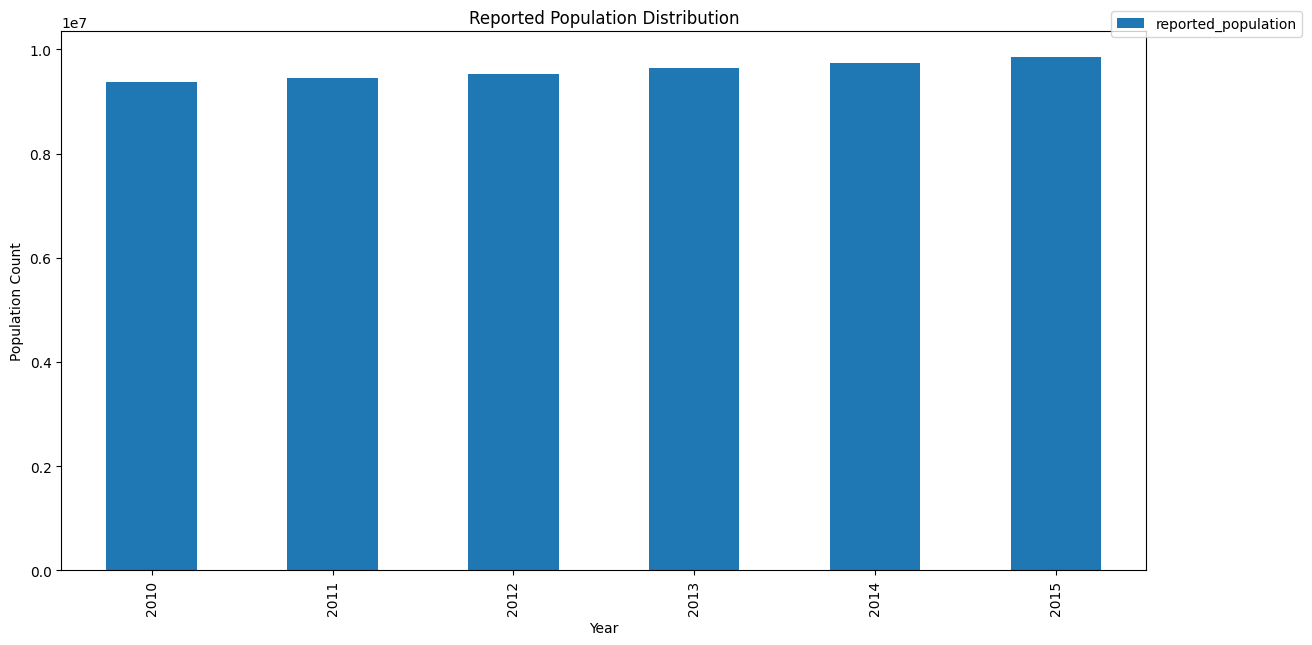

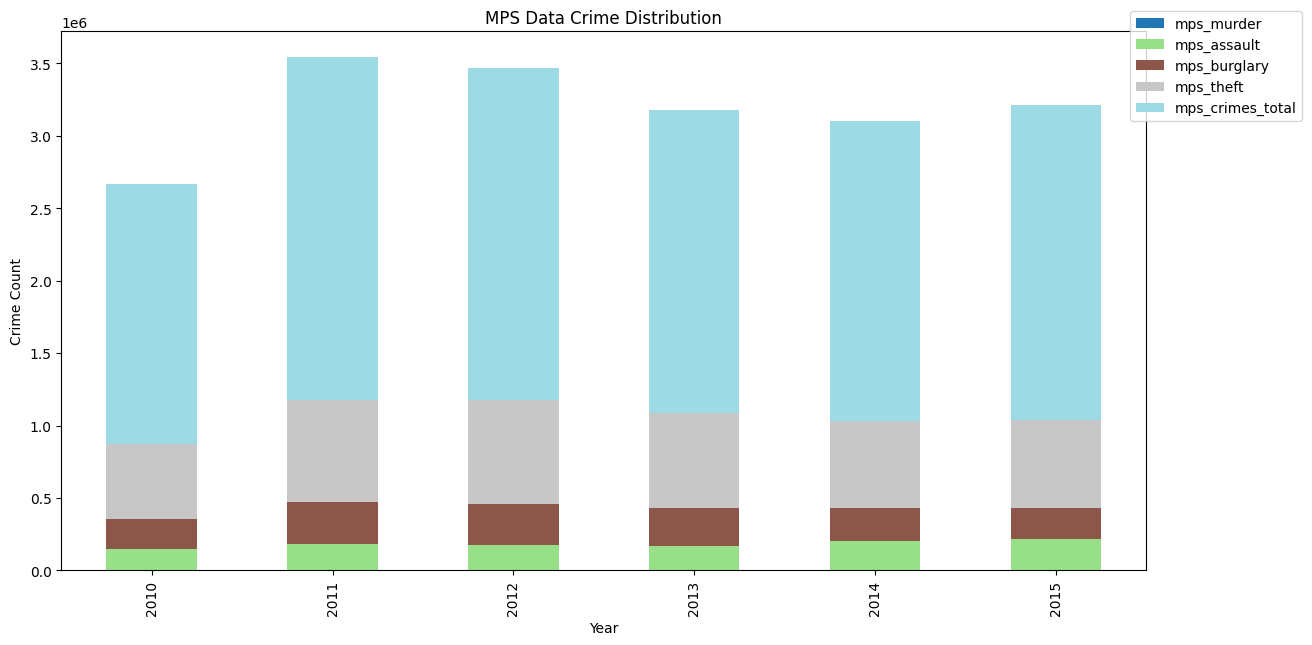

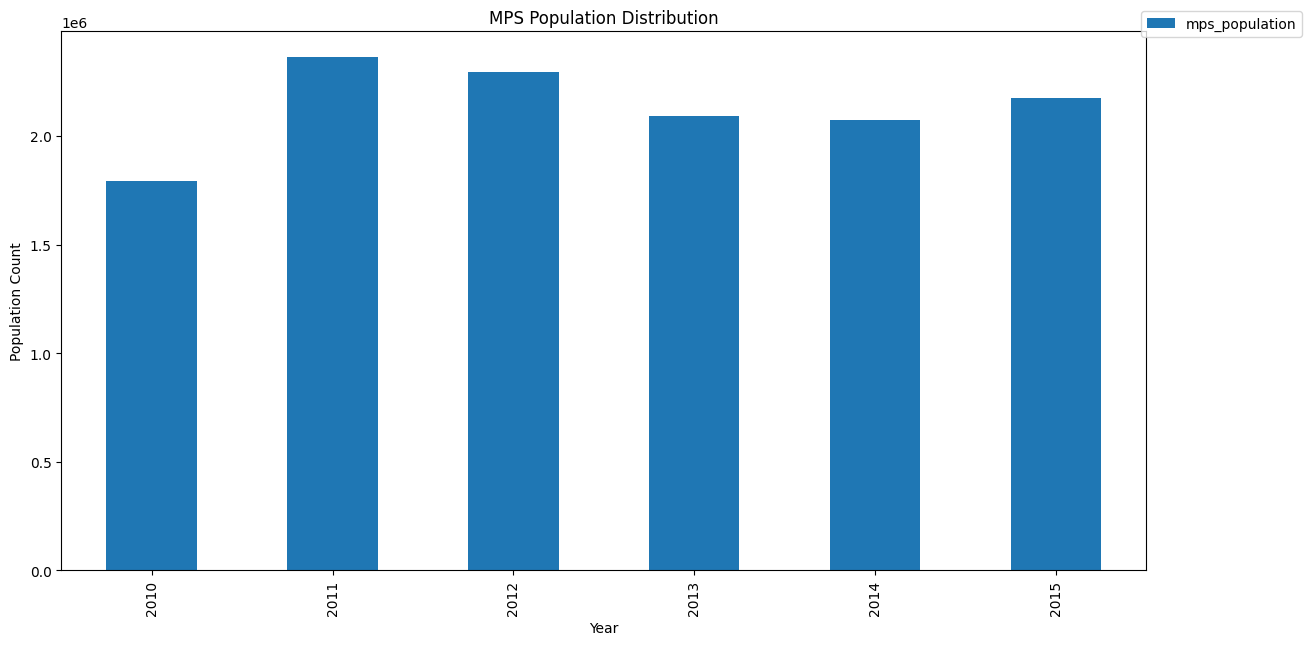

In [28]:
import matplotlib.pyplot as plt

# Function to plot stacked bar plots
def plot_stacked_bar(data, title, y_label, column_prefix):
    data_subset = data.filter(like=column_prefix).copy()
    data_subset.index = data['Year']
    data_subset.drop(columns=[f'{column_prefix}population'], inplace=True)  # Exclude population from this plot
    data_subset.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Year')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.show()

# Separate function to plot population data
def plot_population(data, title, y_label, column_prefix):
    data_subset = data[['Year', f'{column_prefix}population']].copy()
    data_subset.set_index('Year', inplace=True)
    data_subset.plot(kind='bar', figsize=(14, 7), colormap='tab20')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Year')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))
    plt.show()

# Plot the combined data for reported crimes excluding population
plot_stacked_bar(combined_data, 'Reported Data Crime Distribution', 'Crime Count', 'reported_')

# Plot the population data for reported crimes
plot_population(combined_data, 'Reported Population Distribution', 'Population Count', 'reported_')

# Plot the combined data for MPS crimes excluding population
plot_stacked_bar(combined_data, 'MPS Data Crime Distribution', 'Crime Count', 'mps_')

# Plot the population data for MPS crimes
plot_population(combined_data, 'MPS Population Distribution', 'Population Count', 'mps_')



### Scatter Plots

Explanation

    Objective: Define and execute a function to create scatter plots to examine the relationship between population size and total crime counts.
    Key Steps:
        Function Definition:
            plot_scatter() creates scatter plots using sns.scatterplot() to visualize relationships between variables.
            Each data point is colored based on the Year, providing a temporal dimension to the plots.
        Execution: The function is called to create plots for both reported and MPS data, using population and crime totals as axes.
    Benefits for Your Project:
        Correlation Analysis: Scatter plots can reveal potential correlations between population size and crime rates.
        Temporal Insights: Coloring by year helps identify trends or anomalies over time, providing context for changes in data relationships.es.

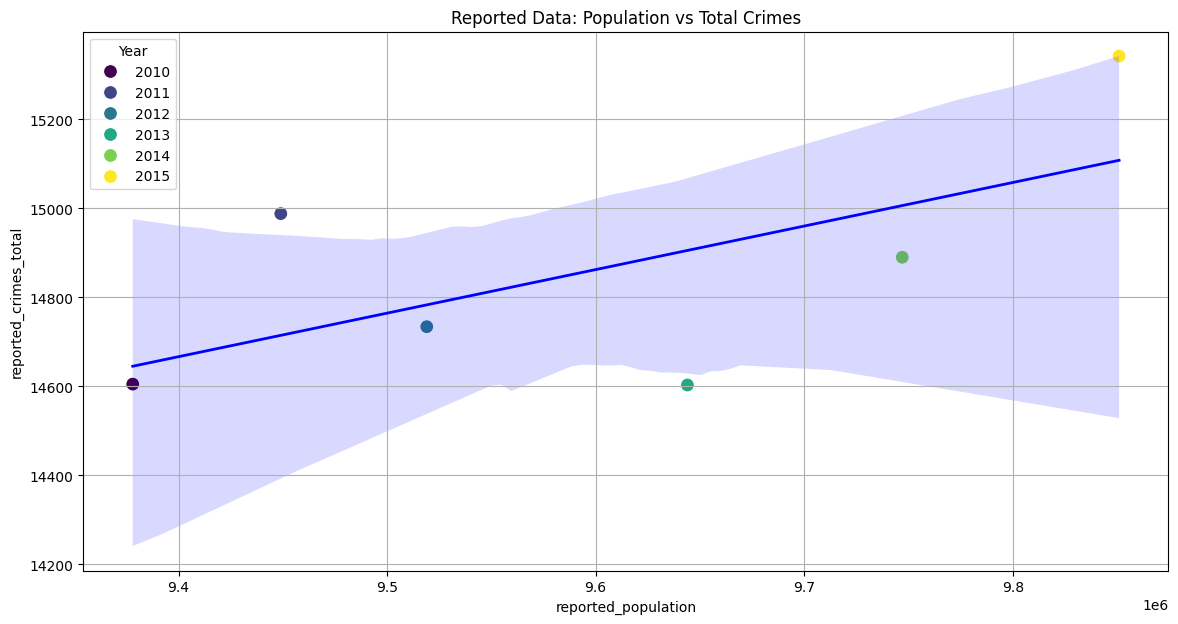

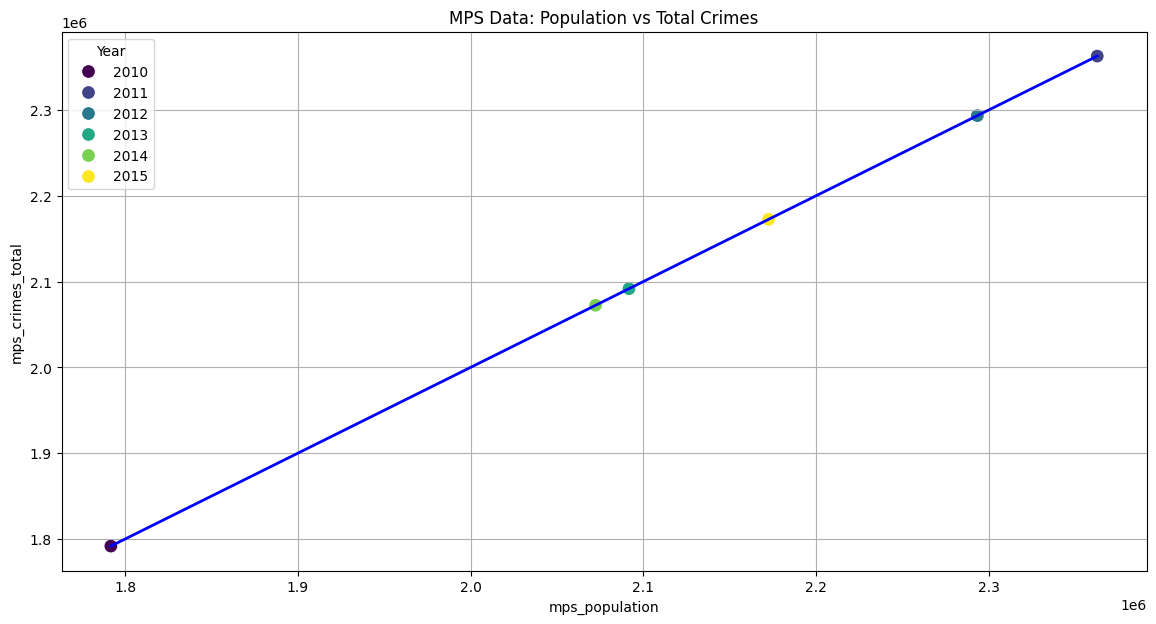

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot scatter plots with improvements
def plot_scatter(data, title, x_column, y_column, hue_column):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column, s=100, palette='viridis')
    sns.regplot(data=data, x=x_column, y=y_column, scatter=False, color='blue', line_kws={"linewidth": 2})
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.legend(title=hue_column)
    plt.show()

plot_scatter(combined_data, 'Reported Data: Population vs Total Crimes', 'reported_population', 'reported_crimes_total', 'Year')
plot_scatter(combined_data, 'MPS Data: Population vs Total Crimes', 'mps_population', 'mps_crimes_total', 'Year')


### Step 3: Perform Regression Analysis to Predict Crimes in 2025

Explanation

    Objective: Use linear regression to predict future crime rates for the year 2025 based on historical data.
    Key Steps:
        Regression Model:
            LinearRegression() is used to fit a model predicting y_column (total crimes) based on x_column (Year).
            fit() trains the model using existing data.
        Prediction:
            predict() forecasts crime totals for the target year (2025) and plots this prediction on a graph.
        Visualization:
            Scatter plots and regression lines are used to visualize the fit of the model and the 2025 prediction.
        Output: The predicted crime totals for 2025 are printed for both reported and MPS data.
    Benefits for Your Project:
        Predictive Insights: Regression analysis provides insights into potential future crime trends, which can inform planning and resource allocation.
        Historical Comparison: Allows for the evaluation of predicted values against historical trends, assessing the model's validity.el.

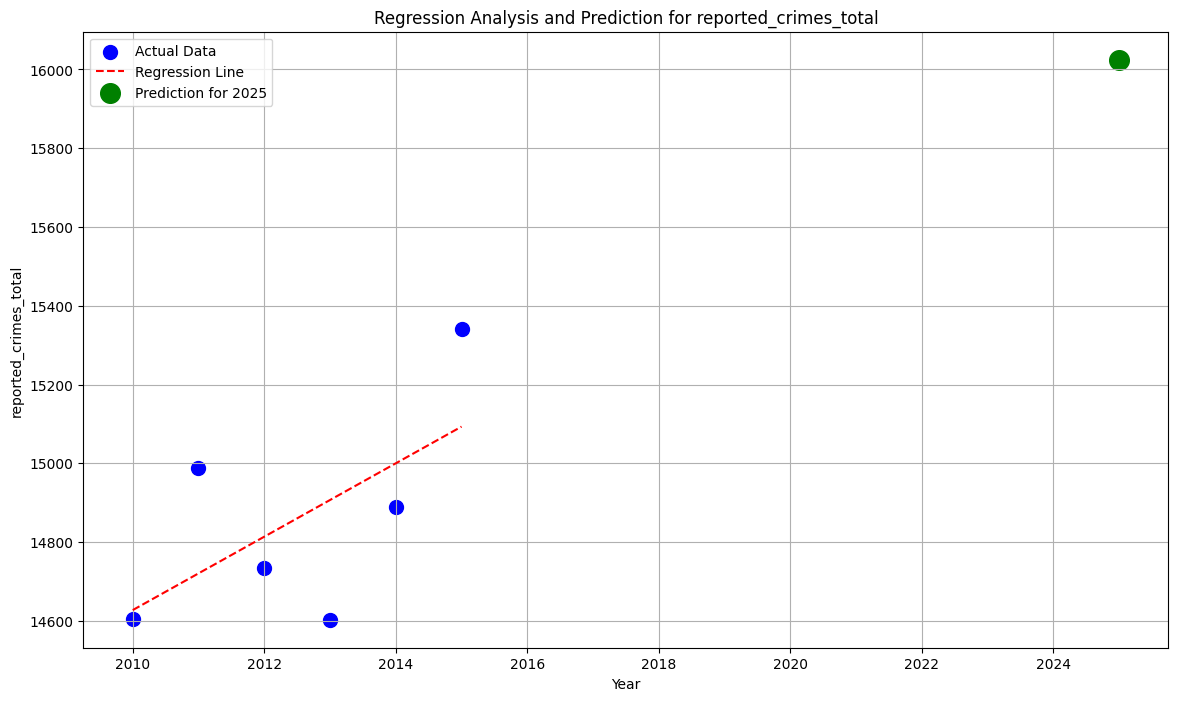

Predicted London Reported Crimes Total in 2025: 16024.619047619053


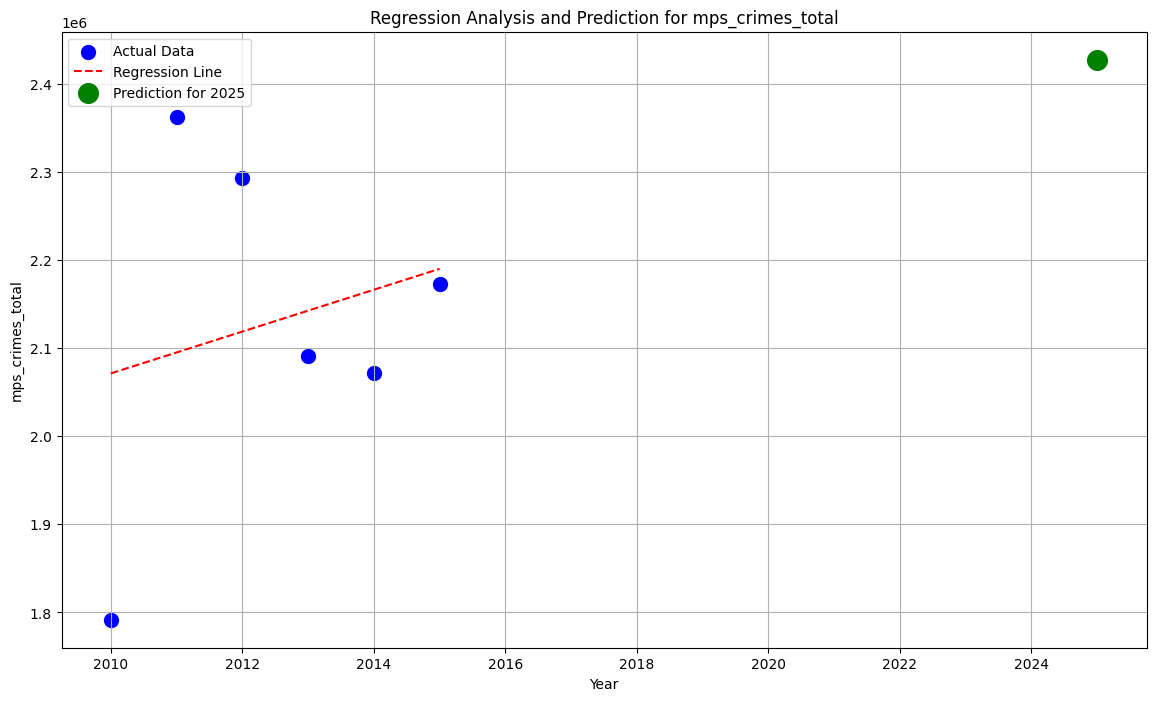

Predicted London MPS Crimes Total in 2025: 2427345.4285714254


In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform regression and plot predictions
def plot_regression(data, column_name, target_year):
    X = data[['Year']]
    y = data[column_name]
    
    # Fit the model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for the target year
    target_year_df = pd.DataFrame({'Year': [target_year]})
    prediction = model.predict(target_year_df)
    
    # Plot the data and the regression line
    plt.figure(figsize=(14, 8))
    plt.scatter(X, y, color='blue', label='Actual Data', s=100)
    plt.plot(X, model.predict(X), color='red', linestyle='--', label='Regression Line')
    plt.scatter(target_year, prediction, color='green', s=200, label=f'Prediction for {target_year}')
    plt.title(f'Regression Analysis and Prediction for {column_name}')
    plt.xlabel('Year')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return prediction[0]

# Example usage for predicting 2025 data
predicted_reported_2025 = plot_regression(combined_data, 'reported_crimes_total', 2025)
print(f'Predicted London Reported Crimes Total in 2025: {predicted_reported_2025}')

predicted_mps_2025 = plot_regression(combined_data, 'mps_crimes_total', 2025)
print(f'Predicted London MPS Crimes Total in 2025: {predicted_mps_2025}')

### Summary

Why Use These Plots:

Line Plots: Show trends over time, making it easy to see how crime rates change each year.
Bar Plots: Compare the total number of different types of crimes for specific years.
Stacked Bar Plots: Show the contribution of different types of crimes to the total, making it easy to visualize the distribution of crime types.
Scatter Plots: Examine the relationship between population size and total crime counts, revealing any correlations.
Regression Line Plots: Predict future crime counts and visualize them alongside historical data, providing insights into future trends.

Benefits:

Comprehensive Analysis: These plots provide a thorough analysis of the crime data, helping identify trends, compare datasets, and understand the distribution of crime types.
Visual Clarity: Visual representations make it easier to understand complex data, facilitating better decision-making.
Predictive Power: Regression analysis and predictions help in planning and resource allocation for future crime prevention efforts.

#### correlation matrix and VIF analysis

    Libraries: Imports libraries for data manipulation (pandas, numpy), plotting (matplotlib, seaborn), and statistical analysis (statsmodels).
    Data Loading: Loads crime data from a CSV file into a DataFrame combined_data.
    Correlation Matrix: Calculates correlations between all pairs of features, identifying how changes in one feature are associated with changes in another.
    Visualization: Uses a heatmap to visually represent correlations, where darker colors indicate stronger correlations.

Benefits:

    Understanding Relationships: Helps you quickly identify which features have strong positive or negative relationships, guiding feature selection and understanding data structure.
    Data Integrity: Ensures no unexpected relationships exist, which might indicate errors or bias in data col

        VIF Calculation: Evaluates multicollinearity among features. High VIF (>10) indicates high correlation with other features, suggesting potential issues in regression models.
    Features Selection: Focuses on features that significantly contribute to the target variable prediction.

Benefits:

    Improved Model Robustness: By identifying and possibly removing or combining highly collinear features, you can stabilize the regression model, making it more reliable.lection.ce model robustness.

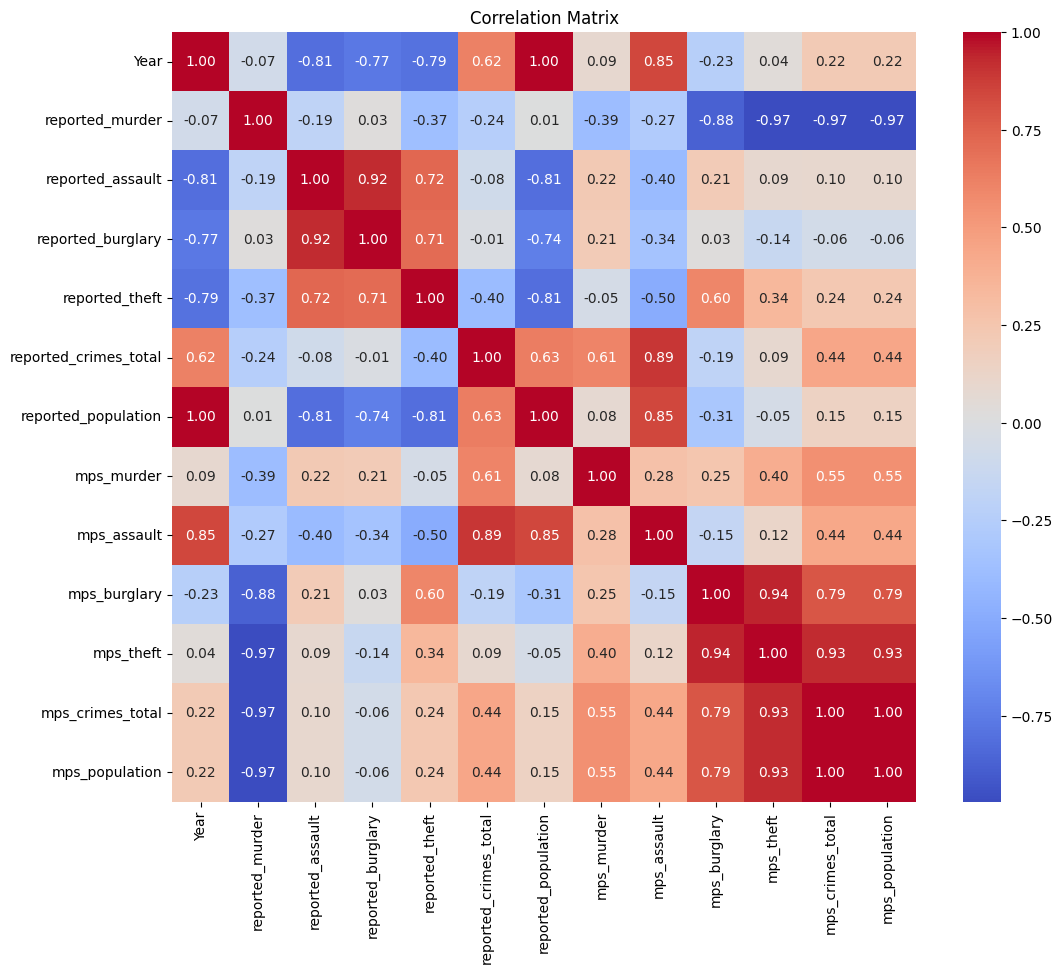

VIF for Reported Crimes Model:
               Feature         VIF
0  reported_population  788.989053
1       reported_theft  788.989053

VIF for MPS Crimes Model:
            Feature          VIF
0       mps_assault   482.198987
1         mps_theft  3061.645577
2      mps_burglary  1218.174785
3  mps_crimes_total  3976.825192


In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
combined_data = pd.read_csv('combined_crime_data.csv')

# Visualize Correlations
plt.figure(figsize=(12, 10))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Define features for VIF calculation
X_reported = combined_data[['reported_population', 'reported_theft']]
X_mps = combined_data[['mps_assault', 'mps_theft', 'mps_burglary', 'mps_crimes_total']]

# Calculate VIF for the selected features
print("VIF for Reported Crimes Model:")
print(calculate_vif(X_reported))
print("\nVIF for MPS Crimes Model:")
print(calculate_vif(X_mps))

# After checking VIF, proceed with the Lasso and Linear Regression


## Lasso Regression 

    Library Imports: Imports necessary tools for regression, including Lasso for feature selection and regularization.
    Feature Selection: Identifies the predictor variables (X_reported, X_mps) and target variables (y_reported, y_mps).
    Data Normalization: Prepares data for regression analysis by selecting relevant features, ensuring the model focuses on significant predictors.

Benefits:

    Lasso Regression: A powerful technique that includes regularization (L1 penalty), which helps in feature selection by shrinking some coefficients to zero. This can be particularly useful in datasets with many predictors, enhancing model interpretability.

#### Import Necessary Libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for now


####  Load and Prepare the Data

In [29]:
# Load your dataset
combined_data = pd.read_csv('combined_crime_data.csv')

# Display the first few rows to understand the structure
print(combined_data.head())

# Define features and target for reported crimes
X_reported = combined_data[['reported_population', 'reported_theft']]
y_reported = combined_data['reported_crimes_total']

# Define features and target for MPS crimes
X_mps = combined_data[['mps_assault', 'mps_theft', 'mps_burglary']]
y_mps = combined_data['mps_crimes_total']



   Year  reported_murder  reported_assault  reported_burglary  reported_theft  \
0  2010                4               936                985            5631   
1  2011                2               947                995            5783   
2  2012                2               914                922            5613   
3  2013                3               837                888            5552   
4  2014                3               859                913            5572   

   reported_crimes_total  reported_population  mps_murder  mps_assault  \
0                  14605              9378000       295.0     151307.0   
1                  14988              9449000       345.0     184399.0   
2                  14734              9519000       310.0     174456.0   
3                  14603              9644000       311.0     168199.0   
4                  14890              9747000       267.0     203438.0   

   mps_burglary  mps_theft  mps_crimes_total  mps_population  
0    

#### Scale the Features
    Feature Scaling: Normalizes the predictor variables to have a mean of zero and a standard deviation of one. This is crucial because Lasso regression is sensitive to the scale of the inputs.

Benefits:

    Consistent Scaling: Ensures all features contribute equally to the distance computations in algorithms sensitive to feature scale, like Lasso regression.

In [30]:
# Scale the features for reported crimes
scaler_reported = StandardScaler()
X_reported_scaled = scaler_reported.fit_transform(X_reported)

# Scale the features for MPS crimes
scaler_mps = StandardScaler()
X_mps_scaled = scaler_mps.fit_transform(X_mps)


#### Define a Function to Evaluate Regression Models

    Model Evaluation Function: Splits data into training and test sets, trains the model, and calculates performance metrics (MSE and R-squared).
    Performance Metrics: MSE provides insight into the prediction error, while R-squared indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

Benefits:

    Model Assessment: Quantitatively evaluates how well the regression model is performing, guiding improvements and adjustments.
    Reusability: The function can be reused for different models, promoting efficient and consistent evaluation across various algorithms.

In [31]:
def evaluate_regression_model(X, y, model, model_name):
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model_name} R-squared (CV): {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Mean Squared Error (Test): {mse:.2f}")
    print(f"{model_name} R-squared (Test): {r2:.2f}\n")

    return model, y_test, y_pred


#### Evaluate the Models

    Model Initialization: Initializes Lasso regression models with a specified alpha (regularization strength) for both reported and MPS datasets.
    Model Evaluation: Applies the evaluate_regression_model function to both datasets, outputting performance metrics.

Benefits:

    Regularization: Controls model complexity and prevents overfitting by adding a penalty for large coefficients.
    Comparison: By evaluating both models with the same metrics, you can directly compare their performance and make informed decisions about which model best suits your needs.

In [32]:
print("Evaluating Reported Crimes Model:")
lasso_reported, y_test_reported, y_pred_reported = evaluate_regression_model(
    X_reported_scaled, y_reported, Lasso(alpha=0.1, random_state=42), "Lasso Regression for Reported Crimes"
)

print("Evaluating MPS Crimes Model:")
lasso_mps, y_test_mps, y_pred_mps = evaluate_regression_model(
    X_mps_scaled, y_mps, Lasso(alpha=0.1, random_state=42), "Lasso Regression for MPS Crimes"
)


Evaluating Reported Crimes Model:
Lasso Regression for Reported Crimes R-squared (CV): nan (+/- nan)
Lasso Regression for Reported Crimes Mean Squared Error (Test): 323859.87
Lasso Regression for Reported Crimes R-squared (Test): -7.83

Evaluating MPS Crimes Model:
Lasso Regression for MPS Crimes R-squared (CV): nan (+/- nan)
Lasso Regression for MPS Crimes Mean Squared Error (Test): 9079583618.21
Lasso Regression for MPS Crimes R-squared (Test): 0.89



#### Visualize the Predictions

    Visualization: Creates scatter plots comparing actual vs. predicted values for reported and MPS crime datasets.
    Line of Equality: Plots a line representing perfect prediction to visually assess how closely the model predictions match actual values.

Benefits:

    Visual Assessment: Enables quick identification of model performance and any systematic prediction errors.
    Communication: Provides an intuitive way to communicate results to stakeholders, illustrating how well the model predictions align with reality.

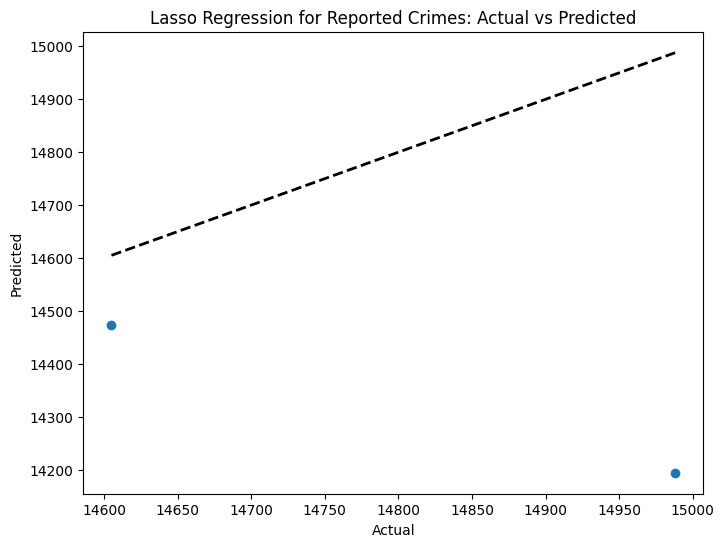

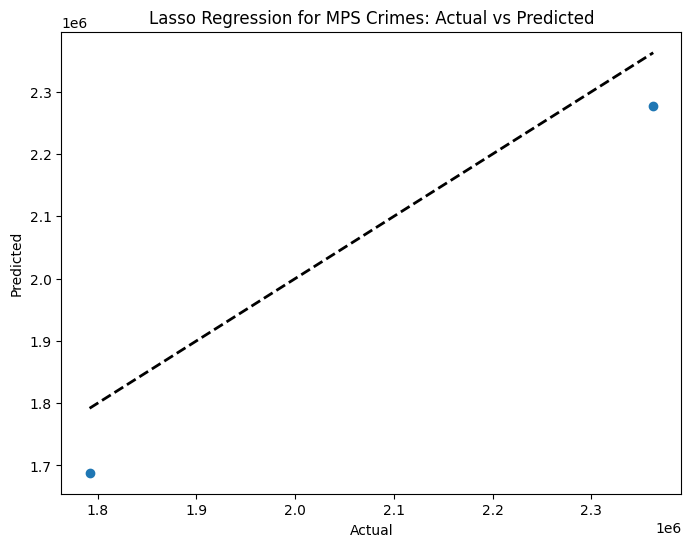

In [34]:
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.show()

plot_predictions(y_test_reported, y_pred_reported, "Lasso Regression for Reported Crimes")
plot_predictions(y_test_mps, y_pred_mps, "Lasso Regression for MPS Crimes")


#### Simulate Future Data for 2025
    Future Simulation: Defines columns for future predictions and calculates growth rates based on historical data.
    Growth Rates: Uses percentage change to project future values, simulating what 2025 might look like under current trends.

Benefits:

    Predictive Insights: Provides estimates of future crime rates, essential for planning and resource allocation.
    Data-Driven Decisions: Supports informed decision-making by offering evidence-based projections.

In [35]:
# Define the feature columns for growth rate calculation
feature_columns = [
    'reported_population',
    'reported_theft',
    'mps_assault',
    'mps_theft',
    'mps_burglary'
]

# Calculate growth rates
years = combined_data['Year'].values
growth_rates = {}

for feature in feature_columns:
    values = combined_data[feature].values
    # Calculate the annual growth rate
    growth_rate = (values[-1] - values[0]) / values[0] / (years[-1] - years[0])
    growth_rates[feature] = growth_rate

# Estimate future values for 2025 based on calculated growth rates
future_year = 2025
start_year = years[-1]

future_values = {}
for feature, growth_rate in growth_rates.items():
    current_value = combined_data[feature].values[-1]
    future_value = current_value * ((1 + growth_rate) ** (future_year - start_year))
    future_values[feature] = future_value

# Create future data arrays
future_data_reported = np.array([[future_values['reported_population'], future_values['reported_theft']]])
future_data_mps = np.array([
    [
        future_values['mps_assault'],
        future_values['mps_theft'],
        future_values['mps_burglary']
    ]
])

print(f"Simulated Future Data for 2025:\nReported Crimes: {future_data_reported}\nMPS Crimes: {future_data_mps}")


Simulated Future Data for 2025:
Reported Crimes: [[1.08910568e+07 4.98377448e+03]]
MPS Crimes: [[498965.19922751 853932.89295132 228588.037298  ]]


#### Scale the Future Data
    Feature Scaling: Scales the future data using the same scaler fitted on the training data to ensure consistent input for prediction.
    Prediction: Uses the trained Lasso models to predict crime rates for 2025.

Benefits:

    Consistency: Ensures that future predictions are made on the same scale as the training data, maintaining model reliability.
    Forward-Looking Analysis: Offers a forecast of crime trends, enabling proactive measures in law enforcement and policy.

In [37]:
# Scale the future data
future_data_reported_scaled = scaler_reported.transform(future_data_reported)
future_data_mps_scaled = scaler_mps.transform(future_data_mps)


#### Predict Future Crime Rates for 2025
    Plotting: Visualizes the historical crime totals and predicted values for 2025 using line plots, providing a clear trend over time.
    Annotations: Highlights the predicted value for 2025 with a distinctive marker, emphasizing future predictions.

Benefits:

    Trend Visualization: Displays past trends alongside future forecasts, enhancing understanding of potential developments.
    Communication: Provides a compelling visual summary of analysis, useful for presentations and reporting.

In [38]:
# Predict future crime rates for 2025
predicted_reported_2025 = lasso_reported.predict(future_data_reported_scaled)
predicted_mps_2025 = lasso_mps.predict(future_data_mps_scaled)

print(f"Predicted Reported Crimes Total for 2025: {predicted_reported_2025[0]:.2f}")
print(f"Predicted MPS Crimes Total for 2025: {predicted_mps_2025[0]:.2f}")


Predicted Reported Crimes Total for 2025: 16899.21
Predicted MPS Crimes Total for 2025: 3843632.76


#### Plot Historical and Predicted Values

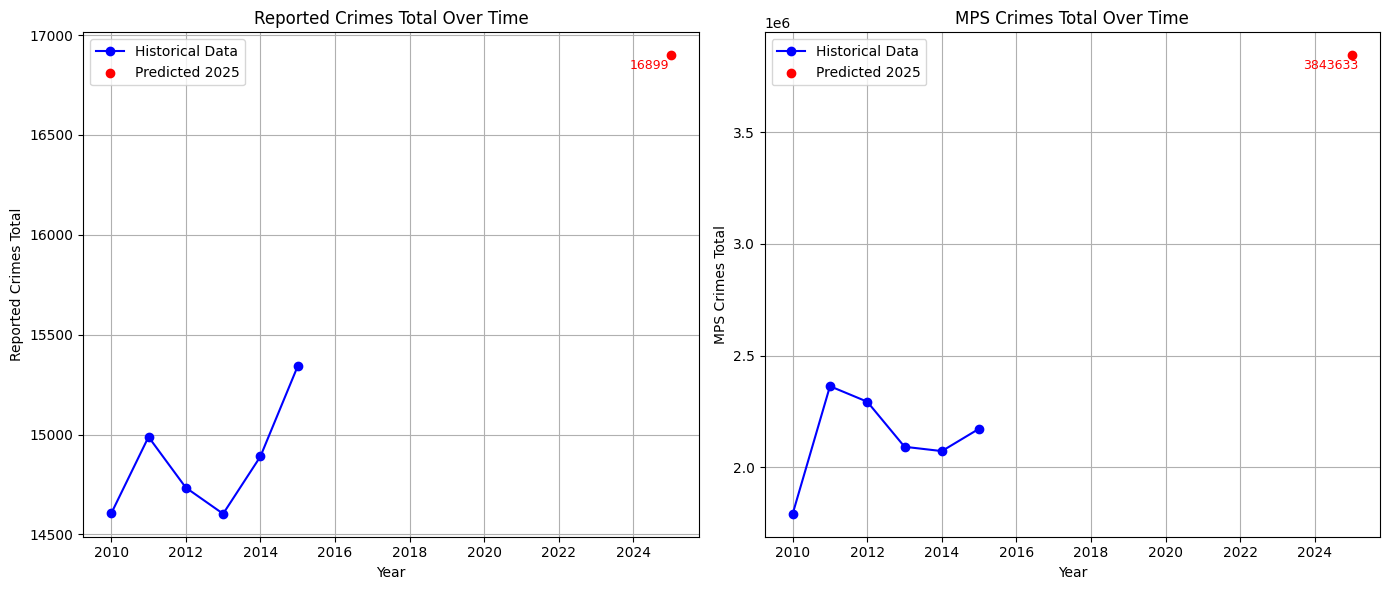

In [40]:
# Append predicted values to historical data for plotting
years = combined_data['Year'].values
reported_crimes_total = combined_data['reported_crimes_total'].values
mps_crimes_total = combined_data['mps_crimes_total'].values

# Add the future year and predicted values
future_year = 2025
years = np.append(years, future_year)
reported_crimes_total = np.append(reported_crimes_total, predicted_reported_2025[0])
mps_crimes_total = np.append(mps_crimes_total, predicted_mps_2025[0])

# Plotting
plt.figure(figsize=(14, 6))

# Plot for reported crimes
plt.subplot(1, 2, 1)
plt.plot(years[:-1], reported_crimes_total[:-1], marker='o', label='Historical Data', linestyle='-', color='blue')
plt.scatter(future_year, predicted_reported_2025, color='red', label='Predicted 2025', zorder=5)
plt.xlabel('Year')
plt.ylabel('Reported Crimes Total')
plt.title('Reported Crimes Total Over Time')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(2010, 2026, 2))
plt.annotate(f'{predicted_reported_2025[0]:.0f}', (future_year, predicted_reported_2025), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=9, color='red')

# Plot for MPS crimes
plt.subplot(1, 2, 2)
plt.plot(years[:-1], mps_crimes_total[:-1], marker='o', label='Historical Data', linestyle='-', color='blue')
plt.scatter(future_year, predicted_mps_2025, color='red', label='Predicted 2025', zorder=5)
plt.xlabel('Year')
plt.ylabel('MPS Crimes Total')
plt.title('MPS Crimes Total Over Time')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(2010, 2026, 2))
plt.annotate(f'{predicted_mps_2025[0]:.0f}', (future_year, predicted_mps_2025), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=9, color='red')

plt.tight_layout()
plt.show()



### Linear Regression

#### Import Necessary Libraries 
Explanation:

    Pandas (pd) and NumPy (np): Used for data manipulation and numerical operations.
    Scikit-learn (train_test_split, StandardScaler, LinearRegression): Provides tools for splitting the dataset, scaling features, and performing linear regression.
    Matplotlib (plt) and Seaborn (sns): Used for data visualization to create informative plots and graphs.
    Warnings: Ignores warnings to keep the output clean, useful during exploratory analysis to focus on core issues rather than warnings.

Benefits:

    Comprehensive Toolkit: Using these libraries gives you the ability to manage data efficiently, perform statistical modeling, and visualize results, making them indispensable for data analysis tasks.
    Focus on Key Insights: Ignoring warnings allows you to concentrate on the important results without unnecessary distractions, especially during the initial model development phase.

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


#### Load and Prepare Your Data
Explanation:

    Data Loading: The dataset combined_crime_data.csv is loaded into a DataFrame, allowing you to manipulate and analyze the data.
    Feature and Target Selection:
        X_reported and X_mps: Feature sets for reported crimes and MPS crimes, respectively.
        y_reported and y_mps: Target variables representing the total crimes.
    Data Examination: Printing the first few rows of the dataset helps verify the data structure and understand the initial dataset characteristics.

Benefits:

    Centralized Data Management: Loading data into a DataFrame makes it easier to perform transformations, cleaning, and analysis, centralizing all data manipulations in one place.
    Targeted Modeling: Defining features and targets separately for reported and MPS crimes allows for focused modeling efforts tailored to specific datasets, enhancing model relevance and performance.

In [42]:
# Load your dataset
combined_data = pd.read_csv('combined_crime_data.csv')

# Define features and target for reported crimes
X_reported = combined_data[['reported_population', 'reported_theft']]
y_reported = combined_data['reported_crimes_total']

# Define features and target for MPS crimes
X_mps = combined_data[['mps_assault', 'mps_theft', 'mps_burglary', 'mps_crimes_total']]
y_mps = combined_data['mps_crimes_total']


#### Data Standardization 
Explanation:

    Standardization: This process scales features so that they have a mean of 0 and a standard deviation of 1.
        scaler_reported and scaler_mps: Scalers for the reported and MPS feature sets, ensuring that each feature contributes equally to the model performance.
    Fit and Transform: The fit_transform method is used to compute the mean and standard deviation and scale the data accordingly.

Benefits:

    Improved Model Performance: Standardizing data is crucial for many machine learning algorithms as it ensures that each feature is on the same scale, preventing any one feature from disproportionately influencing the results.
    Robustness: It makes the model less sensitive to the scale of the inputs, resulting in more stable and reliable predictions.

In [43]:
# Standardize the features
scaler_reported = StandardScaler()
X_reported_scaled = scaler_reported.fit_transform(X_reported)

scaler_mps = StandardScaler()
X_mps_scaled = scaler_mps.fit_transform(X_mps)


#### Train Linear Regression Model

Explanation:

    Data Splitting: Divides the dataset into training and testing sets to evaluate the model's performance on unseen data.
        train_test_split: 80% training and 20% testing data, ensuring a good balance between training the model and evaluating its performance.
    Model Training:
        linear_regression_reported: Model for reported crimes.
        linear_regression_mps: Model for MPS crimes.
    Fitting the Model: The model learns from the training data by fitting the linear regression model.

Benefits:

    Effective Learning: By splitting the data, you ensure that the model can generalize well to new data, avoiding overfitting.
    Baseline Modeling: Linear regression provides a simple, interpretable model to establish baseline performance, facilitating comparison with more complex models.

In [44]:
# Split the data into training and testing sets
X_train_reported, X_test_reported, y_train_reported, y_test_reported = train_test_split(X_reported_scaled, y_reported, test_size=0.2, random_state=42)
X_train_mps, X_test_mps, y_train_mps, y_test_mps = train_test_split(X_mps_scaled, y_mps, test_size=0.2, random_state=42)

# Train Linear Regression model for reported crimes
linear_regression_reported = LinearRegression()
linear_regression_reported.fit(X_train_reported, y_train_reported)

# Train Linear Regression model for MPS crimes
linear_regression_mps = LinearRegression()
linear_regression_mps.fit(X_train_mps, y_train_mps)


LinearRegression()

#### Evaluate Model Performance
Explanation:

    Prediction: The model predicts crime totals using the test dataset.
    Error Metrics:
        Mean Squared Error (MSE): Average of the squared differences between actual and predicted values, indicating the variance of the residuals.
        Root Mean Squared Error (RMSE): Square root of MSE, providing a measure of prediction error in the same units as the target variable.

Benefits:

    Performance Evaluation: MSE and RMSE provide a quantitative measure of the model's prediction accuracy, essential for understanding the model's efficacy and comparing it to other models.
    Model Refinement: Analyzing these errors helps identify areas where the model may need improvement or adjustments, guiding further refinement.

In [45]:
# Evaluate Linear Regression model for reported crimes
y_pred_reported = linear_regression_reported.predict(X_test_reported)
mse_reported = mean_squared_error(y_test_reported, y_pred_reported)
r2_reported = r2_score(y_test_reported, y_pred_reported)

print(f"Reported Crimes Linear Regression Mean Squared Error: {mse_reported:.2f}")
print(f"Reported Crimes Linear Regression R-squared: {r2_reported:.2f}")

# Evaluate Linear Regression model for MPS crimes
y_pred_mps = linear_regression_mps.predict(X_test_mps)
mse_mps = mean_squared_error(y_test_mps, y_pred_mps)
r2_mps = r2_score(y_test_mps, y_pred_mps)

print(f"MPS Crimes Linear Regression Mean Squared Error: {mse_mps:.2f}")
print(f"MPS Crimes Linear Regression R-squared: {r2_mps:.2f}")


Reported Crimes Linear Regression Mean Squared Error: 324233.13
Reported Crimes Linear Regression R-squared: -7.84
MPS Crimes Linear Regression Mean Squared Error: 1438211595.08
MPS Crimes Linear Regression R-squared: 0.98


#### Predict Future Crime Rates for 2025
Explanation:

    Growth Rate Calculation: Determines expected population growth rates for reported and MPS data.
    Future Predictions:
        Calculate Future Population: Computes projected population values for 2025.
        Predict Crimes: Uses the trained models to predict crime rates for 2025, applying the same scaling as used for the training data.

Benefits:

    Proactive Planning: Predicting future crime rates helps authorities plan and allocate resources efficiently, improving crime prevention strategies.
    Data-Driven Decisions: Offers insights into future trends, supporting informed decision-making based on quantitative predictions.

In [46]:
# Simulate future data for 2025 prediction based on historical growth rates
# You can use the growth rates calculated earlier for more accuracy
growth_rates = {
    'reported_population': 0.01,  # Example growth rate
    'reported_theft': 0.02,
    'mps_assault': 0.03,
    'mps_theft': 0.02,
    'mps_burglary': 0.01,
    'mps_crimes_total': 0.015
}

# Calculate future values for 2025
future_data = {
    'reported_population': combined_data['reported_population'].iloc[-1] * (1 + growth_rates['reported_population']),
    'reported_theft': combined_data['reported_theft'].iloc[-1] * (1 + growth_rates['reported_theft']),
    'mps_assault': combined_data['mps_assault'].iloc[-1] * (1 + growth_rates['mps_assault']),
    'mps_theft': combined_data['mps_theft'].iloc[-1] * (1 + growth_rates['mps_theft']),
    'mps_burglary': combined_data['mps_burglary'].iloc[-1] * (1 + growth_rates['mps_burglary']),
    'mps_crimes_total': combined_data['mps_crimes_total'].iloc[-1] * (1 + growth_rates['mps_crimes_total'])
}

# Create future data arrays
future_data_reported = np.array([[future_data['reported_population'], future_data['reported_theft']]])
future_data_mps = np.array([[future_data['mps_assault'], future_data['mps_theft'], future_data['mps_burglary'], future_data['mps_crimes_total']]])

# Scale the future data
future_data_reported_scaled = scaler_reported.transform(future_data_reported)
future_data_mps_scaled = scaler_mps.transform(future_data_mps)

# Predict future crime rates for 2025
predicted_reported_2025 = linear_regression_reported.predict(future_data_reported_scaled)
predicted_mps_2025 = linear_regression_mps.predict(future_data_mps_scaled)

print(f"Predicted Reported Crimes Total for 2025: {predicted_reported_2025[0]:.2f}")
print(f"Predicted MPS Crimes Total for 2025: {predicted_mps_2025[0]:.2f}")


Predicted Reported Crimes Total for 2025: 15119.10
Predicted MPS Crimes Total for 2025: 2214605.16


#### Visualize Predictions
Explanation:

    Plotting Predictions: Visualizes historical and predicted crime rates for reported and MPS data.
    Annotations: Adds labels to highlight predicted values for 2025, making the charts informative and visually engaging.

Benefits:

    Visual Insights: Graphical representation of data trends aids in quickly grasping how crime rates are expected to change over time.
    Communication: Effective visualization communicates results clearly to stakeholders, facilitating understanding and discussion about future trends and strategies.

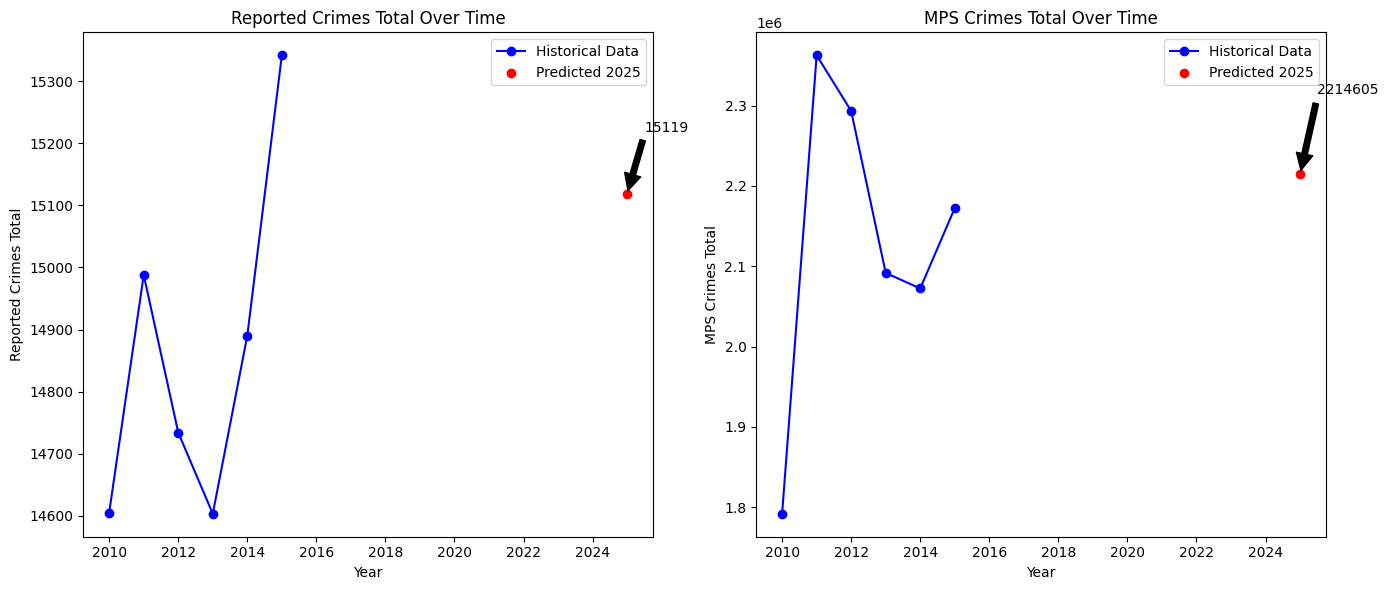

In [48]:
# Visualize predictions with annotations
years = combined_data['Year'].values
plt.figure(figsize=(14, 6))

# Plot for reported crimes
plt.subplot(1, 2, 1)
plt.plot(years, y_reported, 'bo-', label='Historical Data')
plt.scatter([2025], [predicted_reported_2025], color='red', label='Predicted 2025')
plt.annotate(f'{int(predicted_reported_2025[0])}', xy=(2025, predicted_reported_2025), 
             xytext=(2025+0.5, predicted_reported_2025+100),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Reported Crimes Total Over Time')
plt.xlabel('Year')
plt.ylabel('Reported Crimes Total')
plt.legend()

# Plot for MPS crimes
plt.subplot(1, 2, 2)
plt.plot(years, y_mps, 'bo-', label='Historical Data')
plt.scatter([2025], [predicted_mps_2025], color='red', label='Predicted 2025')
plt.annotate(f'{int(predicted_mps_2025[0])}', xy=(2025, predicted_mps_2025), 
             xytext=(2025+0.5, predicted_mps_2025+100000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('MPS Crimes Total Over Time')
plt.xlabel('Year')
plt.ylabel('MPS Crimes Total')
plt.legend()

plt.tight_layout()
plt.show()



### Classification

#### Hotspot Detection

#### Load and Explore the Data
Explanation:

    Purpose: This cell imports the necessary libraries and loads the historical borough-level crime data into a DataFrame called borough_crime_data. It then displays the first few rows of the dataset to give an overview of its structure and checks the columns present in the dataset.

    Benefits:
        Initial Data Inspection: Helps verify that the data has been loaded correctly and provides a glimpse of its structure, which is essential for further analysis.
        Data Understanding: Identifying columns helps in understanding the types of crimes and the corresponding data available for each borough.

In [1]:
import pandas as pd

# Load the MPS Borough Level Crime dataset
borough_data = pd.read_csv('MPS Borough Level Crime (Historical).csv')

# Display the first few rows to understand the structure
print(borough_data.head())

# Check the columns to ensure you have borough and crime data
print(borough_data.columns)


                   MajorText                        MinorText  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
3                   BURGLARY           BURGLARY IN A DWELLING   
4              DRUG OFFENCES              POSSESSION OF DRUGS   

            BoroughName  201004  201005  201006  201007  201008  201009  \
0  Barking and Dagenham       6       5      11      10       6       6   
1  Barking and Dagenham     204     190     218     217     203     161   
2  Barking and Dagenham      48      58      58      46      46      51   
3  Barking and Dagenham     116     102     124     137     153     136   
4  Barking and Dagenham      76      64      82      72      98      87   

   201010  ...  202107  202108  202109  202110  202111  202112  202201  \
0      13  ...       3      12       5       7       5       1       3   
1     196 

C:\Users\jeffo\AppData\Local\Temp\ipykernel_12740\3071149324.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Aggregate Crime Data by Borough
Explanation:

    Purpose: This cell aggregates crime data by summing up the crime counts for each borough and adds a new column Total Crime to the dataset. The data is then sorted based on total crimes to identify hotspots.

    Benefits:
        Hotspot Identification: Sorting the data by total crime counts helps quickly identify which boroughs have the highest crime rates, providing insights into areas that require more attention.
        Data Enrichment: Adding a Total Crime column enriches the dataset, allowing for more comprehensive analysis and visualization.

In [3]:
# Aggregate total crime counts by BoroughName
# Summing across all year-month columns
year_month_columns = [col for col in borough_data.columns if col.isdigit()]
borough_crime_totals = borough_data.groupby('BoroughName')[year_month_columns].sum().reset_index()

# Calculate total crimes for each borough
borough_crime_totals['Total Crimes'] = borough_crime_totals[year_month_columns].sum(axis=1)

# Sort by total crimes to identify hotspots
borough_crime_totals = borough_crime_totals.sort_values(by='Total Crimes', ascending=False)

# Display aggregated data
print(borough_crime_totals.head())



    BoroughName  201004  201005  201006  201007  201008  201009  201010  \
33  Westminster    4963    5156    4883    5494    5140    5058    5287   
20      Lambeth    2714    2859    3109    3055    2794    2913    3071   
27    Southwark    2866    3149    3126    3306    3215    2950    3113   
5        Camden    2614    2869    2682    2660    2589    2614    2864   
24       Newham    2752    2931    2943    2962    2774    2771    2975   

    201011  201012  ...  202108  202109  202110  202111  202112  202201  \
33    5047    4882  ...    4461    4568    5900    5657    5802    5080   
20    3063    2316  ...    2816    3034    2996    2793    2357    2570   
27    2865    2397  ...    2580    2844    2892    2733    2436    2487   
5     3042    2444  ...    2557    2381    2775    2723    2402    2411   
24    3035    2279  ...    2662    2806    3215    2944    2711    2867   

    202202  202203  202204  Total Crimes  
33    5059    5762    5450        686310  
20    2408  

#### Identify Crime Hotspots
Explanation:

    Purpose: This cell defines a threshold to identify crime hotspots, considering boroughs with total crime counts in the top 10% as hotspots. It then filters and displays these boroughs.

    Benefits:
        Targeted Analysis: Identifying hotspots allows for focused analysis on specific areas with high crime rates, aiding in targeted intervention strategies.
        Resource Allocation: Helps allocate resources more efficiently by concentrating efforts on boroughs with the most significant crime challenges.

In [4]:
# Define a threshold for identifying hotspots (e.g., top 20% of boroughs)
threshold = borough_crime_totals['Total Crimes'].quantile(0.80)

# Identify hotspots
hotspots = borough_crime_totals[borough_crime_totals['Total Crimes'] > threshold]

# Display the identified hotspots
print("Crime Hotspots:")
print(hotspots[['BoroughName', 'Total Crimes']])


Crime Hotspots:
      BoroughName  Total Crimes
33    Westminster        686310
20        Lambeth        405437
27      Southwark        398624
5          Camden        388273
24         Newham        385728
6         Croydon        368780
29  Tower Hamlets        357346


#### Visualize the Crime Hotspots

Explanation:

    Purpose: This cell uses Matplotlib to create a bar chart visualizing the crime hotspots identified in the previous step.

    Benefits:
        Visual Insights: Provides a clear visual representation of the boroughs with the highest crime rates, making it easier to communicate findings.
        Data Storytelling: Enhances storytelling by visually highlighting the severity and distribution of crime across different boroughs.

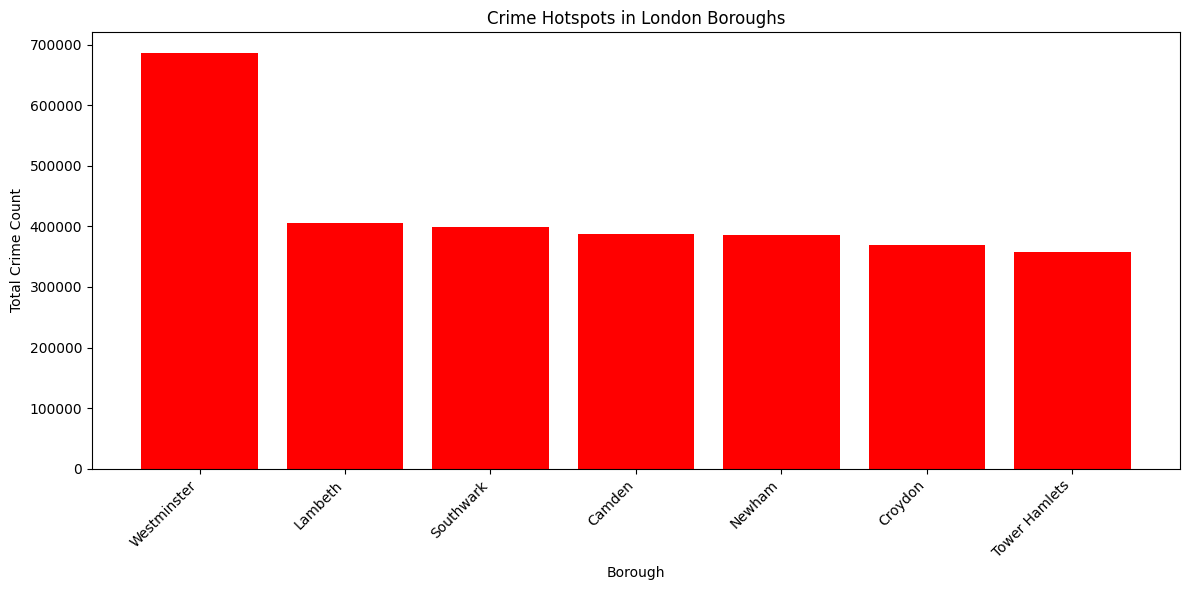

In [6]:
import matplotlib.pyplot as plt

# Plot a bar chart for the identified crime hotspots
plt.figure(figsize=(12, 6))
plt.bar(hotspots['BoroughName'], hotspots['Total Crimes'], color='red')
plt.xlabel('Borough')
plt.ylabel('Total Crime Count')
plt.title('Crime Hotspots in London Boroughs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### Clustering for Crime Hotspots

#### Import Necessary Libraries

Explanation:

    pandas as pd: Used for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.
    numpy as np: Provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
    matplotlib.pyplot as plt: A plotting library used for creating static, interactive, and animated visualizations in Python.
    seaborn as sns: A Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
    StandardScaler from sklearn.preprocessing: Standardizes features by removing the mean and scaling to unit variance, which is essential for algorithms like KMeans that are sensitive to the magnitude of the features.
    KMeans from sklearn.cluster: An unsupervised machine learning algorithm used to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Benefits:

    Data Manipulation: pandas allows efficient data manipulation and cleaning.
    Numerical Operations: numpy supports large data operations, improving computational performance.
    Visualization: matplotlib and seaborn offer robust visualization capabilities to identify patterns.
    Feature Scaling: StandardScaler ensures data normalization, critical for clustering.
    Clustering Algorithm: KMeans helps in identifying groups within the data.nsights.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



#### Load and Inspect Data

Explanation:

    Load Data: Reads a CSV file containing crime data for NYC boroughs over recent years into a DataFrame.
    Inspect Data: The head() function is used to preview the first few rows of the dataset, and columns are used to display the column names, providing insights into the data's structure.

Benefits:

    Initial Data Exploration: Allows understanding of the dataset's structure, column names, and the types of data stored, crucial for further analysis and cleaning steps.

In [54]:
# Load the recent 24-month crime data
borough_recent = pd.read_csv('MPS Borough Level Crime (Historical).csv')

# Display the first few rows to understand the data structure
print("Recent Crime Data - Head")
print(borough_recent.head())

# Display the columns to understand the data structure
print("Columns in the dataset:")
print(borough_recent.columns)


Recent Crime Data - Head
                   MajorText                        MinorText  \
0  ARSON AND CRIMINAL DAMAGE                            ARSON   
1  ARSON AND CRIMINAL DAMAGE                  CRIMINAL DAMAGE   
2                   BURGLARY  BURGLARY BUSINESS AND COMMUNITY   
3                   BURGLARY           BURGLARY IN A DWELLING   
4              DRUG OFFENCES              POSSESSION OF DRUGS   

            BoroughName  201004  201005  201006  201007  201008  201009  \
0  Barking and Dagenham       6       5      11      10       6       6   
1  Barking and Dagenham     204     190     218     217     203     161   
2  Barking and Dagenham      48      58      58      46      46      51   
3  Barking and Dagenham     116     102     124     137     153     136   
4  Barking and Dagenham      76      64      82      72      98      87   

   201010  201011  201012  201101  201102  201103  201104  201105  201106  \
0      13      13      14       5      12      13      1

#### Aggregate Crime Data by Borough

Explanation:

    Pivot Data: The melt() function transforms wide data into a long format, which is often easier to work with for analysis.
    Aggregate Data: Groups the data by borough and calculates the total crime count per borough using groupby and agg functions.

Benefits:

    Data Summarization: Aggregating data provides a summary view of crime activity by borough, highlighting which areas have higher crime rates.
    Easier Analysis: A summarized dataset is easier to analyze and visualize, leading to better insights.

In [55]:
# Melt the DataFrame to transform monthly columns into rows
borough_crime_melted = borough_recent.melt(id_vars=['MajorText', 'MinorText', 'BoroughName'],
                                           var_name='Month', value_name='CrimeCount')

# Group by 'BoroughName' to calculate the total crimes per borough
borough_crime_totals = borough_crime_melted.groupby('BoroughName')['CrimeCount'].sum().reset_index()
borough_crime_totals.rename(columns={'CrimeCount': 'TotalCrimes'}, inplace=True)

# Display the aggregated data
print("Total Crimes by Borough:")
print(borough_crime_totals.head())


Total Crimes by Borough:
            BoroughName  TotalCrimes
0  Barking and Dagenham       213965
1                Barnet       312477
2                Bexley       166432
3                 Brent       333750
4               Bromley       260341


#### Standardize the Data for Clustering

Explanation:

    Standardize Features: Uses StandardScaler to normalize the CrimeCount column, which is critical for clustering algorithms like KMeans, which are sensitive to the scale of input features.

Benefits:

    Normalization: Ensures that each feature contributes equally to the distance calculations in KMeans, preventing features with larger ranges from dominating the clustering results.

In [56]:
# Standardize the 'TotalCrimes' column for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(borough_crime_totals[['TotalCrimes']])

# Display the standardized data
print("Standardized Crime Data:")
print(X_scaled[:5])  # Display first 5 standardized values


Standardized Crime Data:
[[-0.57596565]
 [ 0.2763816 ]
 [-0.9872315 ]
 [ 0.46044022]
 [-0.17471041]]


#### Determine Optimal Number of Clusters Using the Elbow Method

Explanation:

    WCSS (Within-Cluster Sum of Square): Computes the sum of squared distances of samples to their closest cluster center, which decreases with an increase in the number of clusters.
    Elbow Method: Plots the WCSS against the number of clusters to identify the optimal cluster number where the curve begins to bend, resembling an elbow.

Benefits:

    Optimal Clustering: Helps in determining the appropriate number of clusters for KMeans, ensuring meaningful grouping of data points.
    Visual Insight: Provides a visual representation to decide the number of clusters based on the rate of reduction in WCSS.

C:\Users\jeffo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jeffo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


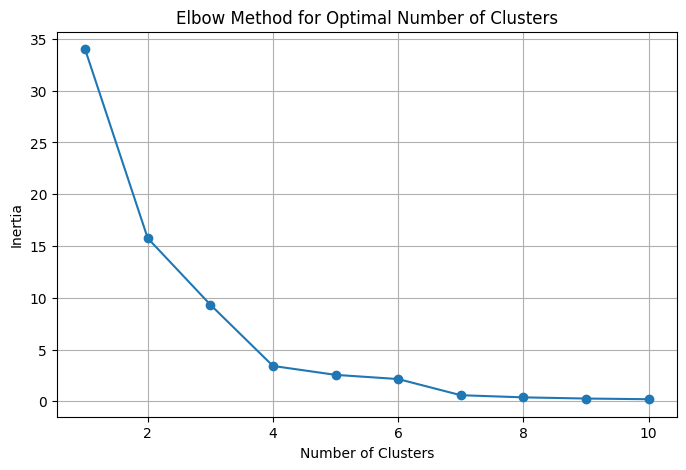

In [57]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Apply K-Means Clustering

Explanation:

    Apply Clustering: Utilizes KMeans to partition the data into a specified number of clusters (optimal_clusters) and assigns cluster labels to each borough.
    Store Results: Adds a Cluster column to the DataFrame, indicating the cluster each borough belongs to.

Benefits:

    Data Segmentation: Segments the boroughs into clusters, allowing identification of crime patterns and hotspots.
    Enhanced Insights: Provides a basis for further analysis, such as comparing characteristics between clusters.

In [58]:
# Choose the optimal number of clusters based on the elbow plot analysis
optimal_clusters = 4  # Adjust this number based on the elbow plot

# Apply K-Means clustering to the data
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
borough_crime_totals['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustering results
print("Clustering Results:")
print(borough_crime_totals.head())


Clustering Results:
            BoroughName  TotalCrimes  Cluster
0  Barking and Dagenham       213965        1
1                Barnet       312477        0
2                Bexley       166432        1
3                 Brent       333750        2
4               Bromley       260341        0


#### Visualize Clusters

Explanation:

    Plot Clusters: Creates a bar plot using seaborn to visualize crime counts across boroughs, colored by cluster.
    Enhance Readability: Customizes the plot for clarity, including titles, axis labels, and a legend.

Benefits:

    Visual Analysis: Provides a clear and informative visualization of how boroughs are grouped into clusters based on crime rates.
    Decision-Making: Assists stakeholders in understanding and prioritizing areas for resource allocation and intervention efforts.

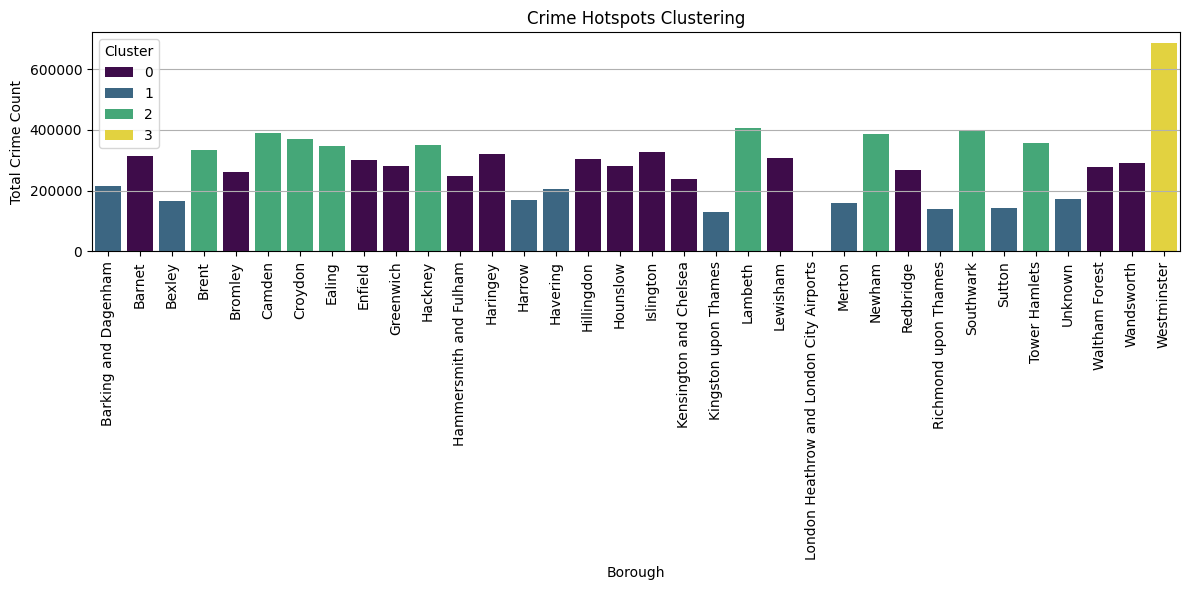

In [59]:
# Visualize the clusters using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='BoroughName', y='TotalCrimes', hue='Cluster', data=borough_crime_totals, dodge=False, palette='viridis')
plt.xticks(rotation=90)
plt.title('Crime Hotspots Clustering')
plt.xlabel('Borough')
plt.ylabel('Total Crime Count')
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Generative AI Export

#### Export Lasso Regression Model

Explanation:

    joblib: This command ensures that the joblib library is installed. joblib is used for lightweight pipelining in Python, particularly for saving and loading Python objects that contain large data, such as trained machine learning models.

Benefits:

    Persistence: Installing joblib allows you to persist models to disk, enabling you to save and reload models efficiently without retraining them.
    Efficiency: joblib can compress large objects and support parallel execution, which is particularly useful when working with large datasets or complex models.

In [64]:
!pip install joblib



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Explanation:

    Import Libraries: Essential libraries are imported for data manipulation (pandas), machine learning (Lasso, train_test_split), and model persistence (joblib).

    Load Data: Reads the combined_crime_data.csv file into a DataFrame, ensuring the correct path is specified.

    Define Features and Target:
        Features (X): Includes columns such as reported_population, reported_assault, reported_burglary, and reported_theft.
        Target (y): The reported_murder column is set as the target variable.

    Split Data: Uses train_test_split to divide the data into training and testing sets, with 20% of the data reserved for testing. The random_state ensures reproducibility.

    Train Lasso Regression Model:
        Lasso Model: Initializes the Lasso regression model with an alpha parameter, which controls the strength of regularization. The model is then fitted to the training data.

    Save Model:
        joblib.dump: Saves the trained Lasso regression model to a file (lasso_model.pkl) for future use.

    Confirmation: Prints a message confirming that the model has been saved.

Benefits:

    Feature Selection: Lasso regression is useful for feature selection due to its ability to shrink coefficients of less important features to zero.
    Model Persistence: Saving the model with joblib allows for easy reuse, enabling you to load the model without retraining it, thus saving time and computational resources.
    Regularization: The alpha parameter helps prevent overfitting by adding a penalty on the magnitude of coefficients, which can improve model generalization.

In [66]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import joblib

# Load your data
df = pd.read_csv('combined_crime_data.csv')  # Make sure this is the correct path to your CSV file

# Define your features and target
X = df[['reported_population', 'reported_assault', 'reported_burglary', 'reported_theft']]
y = df['reported_murder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter if needed
lasso_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(lasso_model, 'lasso_model.pkl')

# Confirm that the model has been saved
print("Lasso Regression model saved as 'lasso_model.pkl'")


Lasso Regression model saved as 'lasso_model.pkl'


In [67]:

import sklearn
print(sklearn.__version__)


1.4.1.post1
